In [2]:
# !pip install emoji

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot


import re
import string
import emoji
from bs4 import BeautifulSoup
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')


from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import distance
from fuzzywuzzy import fuzz


import time
from tqdm.notebook import tqdm
tqdm.pandas()


# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV


# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from category_encoders import TargetEncoder
# from sklearn.preprocessing import StandardScaler


# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier


# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import roc_curve

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/admin/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df_eda1 = pd.read_csv('./data/non_nlp_features/df_eda1.csv')
df_eda1.head(2)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  ...  \
0  My students are English learners that are work...  ...   
1  Our students arrive to our school eager to lea...  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   

          dos  sub_year  sub_month sub_dow  sub_hour  records_per_user  \
0  2016-12-05      2016         12       0        13                 1   
1  2016-10-25      2016         10       1         9                 4   

   records_per_user_cat  
0         Single Record  
1       Multiple Record  

[2 rows x 23 columns]

In [5]:
df_eda1.shape

(109245, 23)

In [6]:
df_eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109245 entries, 0 to 109244
Data columns (total 23 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   id                                            109245 non-null  object
 1   teacher_id                                    109245 non-null  object
 2   teacher_prefix                                109245 non-null  object
 3   school_state                                  109245 non-null  object
 4   project_submitted_datetime                    109245 non-null  object
 5   project_grade_category                        109245 non-null  object
 6   project_subject_categories                    109245 non-null  object
 7   project_subject_subcategories                 109245 non-null  object
 8   project_title                                 109245 non-null  object
 9   project_essay_1                               109245 non-nu

In [7]:
df_eda1.isna().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       0
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105488
project_essay_4                                 105488
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dos                                                  0
sub_year                                             0
sub_month 

# **Textual Features (Application Related Features)**
- 'project_title'
- 'project_essay_1'
- 'project_essay_2'
- 'project_essay_3'
- 'project_essay_4'
- 'project_resource_summary'

# **Project_Title**

In [8]:
df_text1 = df_eda1[['id', 'teacher_id',
                    'project_title', 
                    # 'project_essay_1', 'project_essay_2', 
                    # 'project_essay_3', 'project_essay_4', 
                    # 'project_resource_summary', 
                    'project_is_approved']].copy()
df_text1.head()

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3  p246581  f3cb9bffbba169bef1a77b243e620b60   
4  p104768  be1f7507a41f8479dc06f047086a39ec   

                                       project_title  project_is_approved  
0   Educational Support for English Learners at Home                    0  
1              Wanted: Projector for Hungry Learners                    1  
2  Soccer Equipment for AWESOME Middle School Stu...                    0  
3                             Techie Kindergarteners                    1  
4                             Interactive Math Tools                    1

In [9]:
# Looking a t few project titles
print(df_text1['project_title'].iloc[10])
print(df_text1['project_title'].iloc[100])
print(df_text1['project_title'].iloc[1000])
print(df_text1['project_title'].iloc[10000])
print(df_text1['project_title'].iloc[100000])

Reading Changes Lives
21st Century learners, 21st century technology!
Sailing Into a Super 4th Grade Year
Becoming 'Readerly' Readers
Cork Board for Interactive Display


In [10]:
print('Total rows:', df_text1['project_title'].shape[0])
print('#Unique project titles:', df_text1['project_title'].nunique())

Total rows: 109245
#Unique project titles: 100850


In [11]:
# Repeated project titles present in ~8k samples
109245-100850

8395

## **Duplicate Check:**

In [12]:
proj_title_aprv_rate = df_text1.groupby('project_title')['project_is_approved'].agg(['sum', 'count']).reset_index()
proj_title_aprv_rate.rename({'sum':'#submissions_approved', 'count': '#submissions'}, axis=1, inplace=True)
proj_title_aprv_rate.sort_values(by='#submissions', ascending=False, inplace=True)
proj_title_aprv_rate['approval_rate'] = 100*proj_title_aprv_rate['#submissions_approved']/proj_title_aprv_rate['#submissions']

In [13]:
# Top25 most occuring project_titles
proj_title_aprv_rate.loc[proj_title_aprv_rate['#submissions']>1].iloc[:25]

project_title  #submissions_approved  \
30212                        Flexible Seating                    192   
95771                   Wiggle While You Work                     87   
13754                    Can You Hear Me Now?                     84   
95733                    Wiggle While We Work                     74   
95788                  Wiggle While You Work!                     65   
95745                   Wiggle While We Work!                     68   
92968            We Like to Move It, Move It!                     58   
53515                              Listen Up!                     49   
51723                       Let's Get Moving!                     37   
32674                       Full STEAM Ahead!                     36   
86502             Technology in the Classroom                     38   
17350                      Classroom Supplies                     23   
96834                   Wobble While You Work                     34   
5078                      Alternative Seating                     30   
96820                   Wobble While We Work!                     30   
17146                       Classroom Library                     28   
51744                    Let's Get Organized!                     24   
96835                  Wobble While You Work!                     28   
30740  Flexible Seating for Flexible Learners                     24   
82523                    Supplies for Success                     20   
31160                       Flexible Seating!                     23   
28029        Extra! Extra! Read All About It!                     27   
84750                Teaching with Technology                     21   
69666                      Read All About It!                     23   
49994                   Learning Through Play                     15   

       #submissions  approval_rate  
30212           234      82.051282  
95771            93      93.548387  
13754            91      92.307692  
95733            83      89.156627  
95788            72      90.277778  
95745            71      95.774648  
92968            66      87.878788  
53515            54      90.740741  
51723            47      78.723404  
32674            45      80.000000  
86502            41      92.682927  
17350            36      63.888889  
96834            36      94.444444  
5078             34      88.235294  
96820            33      90.909091  
17146            32      87.500000  
51744            29      82.758621  
96835            29      96.551724  
30740            29      82.758621  
82523            29      68.965517  
31160            29      79.310345  
28029            28      96.428571  
84750            26      80.769231  
69666            26      88.461538  
49994            25      60.000000

In [14]:
# Bottom25 most occuring project_titles
proj_title_aprv_rate.loc[proj_title_aprv_rate['#submissions']>1].iloc[-25:]

project_title  \
97759                                  Writing Our Future   
48396              Kinesthetic Kinders: Get Out and Play!   
26763                              Essentials for Success   
49938                              Learning Through Games   
72674   Robotics in the Classroom: The World of Connec...   
49976                          Learning Through Movement!   
48338                             Kindles for my Kinders!   
51323                                     Let's Add It Up   
49913                                Learning Through Art   
77750                                       Sit & Be Fit!   
27860        Exploring the World With Out Leaving School!   
100822  “Changing The World With Technology.\" ~Bill G...   
49980                  Learning Through Music & Movement!   
49961                           Learning Through Literacy   
75144   Scholastic News: Shaping Young Minds into Crit...   
97797                             Writing Towards Success   
27886                           Exploring with Technology   
27955                               Extended Recess Needs   
51375                 Let's Bring Technology to 4th Grade   
80                    'Movin and Goovin' in Kindergarten!   
97798                          Writing Towards the Future   
76447                                 Seeing is Believing   
74015                                         STEM It Up!   
97750                                   Writing Materials   
99338               \"Today a Reader, Tomorrow a Leader\"   

        #submissions_approved  #submissions  approval_rate  
97759                       2             2          100.0  
48396                       2             2          100.0  
26763                       0             2            0.0  
49938                       1             2           50.0  
72674                       2             2          100.0  
49976                       2             2          100.0  
48338                       1             2           50.0  
51323                       1             2           50.0  
49913                       1             2           50.0  
77750                       2             2          100.0  
27860                       0             2            0.0  
100822                      2             2          100.0  
49980                       2             2          100.0  
49961                       2             2          100.0  
75144                       2             2          100.0  
97797                       1             2           50.0  
27886                       2             2          100.0  
27955                       1             2           50.0  
51375                       2             2          100.0  
80                          2             2          100.0  
97798                       2             2          100.0  
76447                       2             2          100.0  
74015                       1             2           50.0  
97750                       2             2          100.0  
99338                       2             2          100.0

**Observations:**
- We see many titles are mostly similar except for a small difference in some punctuation marks
- We will preprocess the feature, so that these small differences are merged together

### **Checking Approval ratings of submissions: duplicate vs non-duplicate proj_titles**

In [15]:
df_text1['title_count_pid'] = df_text1.groupby(['project_title'])[['id']].transform(lambda x: x.count())
df_text1.head(3)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0   

                                       project_title  project_is_approved  \
0   Educational Support for English Learners at Home                    0   
1              Wanted: Projector for Hungry Learners                    1   
2  Soccer Equipment for AWESOME Middle School Stu...                    0   

   title_count_pid  
0                1  
1                1  
2                1

In [16]:
print('Approval rate of submissions having non duplicate title')
print(df_text1.loc[df_text1['title_count_pid']==1, 'project_is_approved'].value_counts(normalize=True))
print('-'*75)
print('Approval rate of submissions having duplicate titles')
print(df_text1.loc[df_text1['title_count_pid']>1, 'project_is_approved'].value_counts(normalize=True))

Approval rate of submissions having non duplicate title
1    0.846872
0    0.153128
Name: project_is_approved, dtype: float64
---------------------------------------------------------------------------
Approval rate of submissions having duplicate titles
1    0.862083
0    0.137917
Name: project_is_approved, dtype: float64


In [17]:
# Since approval rating is almost same across dup and non-dup titles, we drop the feature 'title_count_pid'
df_text1.drop('title_count_pid', axis=1, inplace=True)

## **PreProcessing (Version1) & Basic FE**

- Perform preprocessing (Version1)
- Obtain naive token features

In [18]:
def naive_features_title_token(text):

    
    token_features = [0.0]*13
    
    if len(text)==0:
        return token_features
    
    # Handle escape sequences
    text = re.sub(r'\\[nrt]', ' ', text.strip())
    
    # Count emojis
    emojis = sum([emoji.is_emoji(char) for char in text])
    text1 = ''.join([char for char in text if emoji.is_emoji(char) is False])
    
    # Count Emoticons
    emoticon_pattern = r'[:;=8][-~]?[)D(|/\\OpP3]'
    emoticons = len(re.findall(emoticon_pattern, text1))
    text2 = re.sub(emoticon_pattern, '', text1)
    
    # Count Punctuations
    punctuation_set = set(string.punctuation)
    punctuations =  len([char for char in text2 if char in punctuation_set])
    text3 = ''.join([char for char in text2 if char not in punctuation_set])

    # Count completely uppercase words
    capwords = sum([word.isupper() for word in text3.split()])
    
    
    # Lowercasing and removing extra white spaces
    text4 = (' ').join([word.strip() for word in text3.lower().split()])
    tokens = text4.split()
    
    
    # # Identify Abbreviations or Colloquialisms (Taking a lot of time)
    # english_words_set = set(words.words())
    # abbreviations = [word for word in tokens if word.strip() not in english_words_set]
    
    # Stop words in English
    stop_words_eng = stopwords.words('english') 
    
    # Stop and non stop words in text
    stop_words = [word for word in tokens if word in stop_words_eng]
    non_stop_words = [word for word in tokens if word not in stop_words_eng]
    
    
    token_features[0] = emojis # Number of emojis
    token_features[1] = emoticons # Number of emoticons
    token_features[2] = punctuations # Number of punctuations
    token_features[3] = capwords # Number of capwords
    token_features[4] = round(capwords/len(tokens), 3) # Ratio capwords/words
    token_features[5] = len(tokens) # Number of words
    token_features[6] = len(text4) # Number of characters
    token_features[7] = round(len(text4)/len(tokens), 3) # Ratio characters/words
    # token_features[8] = len(abbreviations) # Number of abbreviations
    token_features[9] = len(stop_words) # Number of stop words
    token_features[10] = len(non_stop_words) # Number of non stop words
    token_features[11] = round(len(stop_words)/len(tokens), 3) # Ratio stop words/words
    token_features[12] = text4 # Primary pre-processed text
    

    return token_features

In [19]:
print(naive_features_title_token(df_text1['project_title'].iloc[49068]))

[4, 0, 1, 0, 0.0, 9, 54, 6.0, 0.0, 3, 6, 0.333, 'third grade adventures the quest for the magic tablets']


In [20]:
print(naive_features_title_token("'Movin and Goovin' :) in Kindergarten! :D"))

[0, 2, 3, 0, 0.0, 5, 32, 6.4, 0.0, 2, 3, 0.4, 'movin and goovin in kindergarten']


In [21]:
start_time = time.time()
df_text1['project_title'].iloc[:1000].apply(naive_features_title_token)
end_time = time.time()
print(end_time-start_time)

0.07026267051696777


In [22]:
proj_title_naive_token_features = df_text1['project_title'].apply(naive_features_title_token)


df_text1['title_emoj'] = list(map(lambda x: x[0], proj_title_naive_token_features))
df_text1['title_emot'] = list(map(lambda x: x[1], proj_title_naive_token_features))
df_text1['title_punc'] = list(map(lambda x: x[2], proj_title_naive_token_features))
df_text1['title_capwords'] = list(map(lambda x: x[3], proj_title_naive_token_features))
df_text1['title_capwords_r'] = list(map(lambda x: x[4], proj_title_naive_token_features))
df_text1['title_words'] = list(map(lambda x: x[5], proj_title_naive_token_features))
df_text1['title_chars'] = list(map(lambda x: x[6], proj_title_naive_token_features))
df_text1['title_chars_r'] = list(map(lambda x: x[7], proj_title_naive_token_features))
df_text1['title_stopwords'] = list(map(lambda x: x[9], proj_title_naive_token_features))
df_text1['title_nonstopwords'] = list(map(lambda x: x[10], proj_title_naive_token_features))
df_text1['title_stopwords_r'] = list(map(lambda x: x[11], proj_title_naive_token_features))
df_text1['project_title_pp1'] = list(map(lambda x: x[12], proj_title_naive_token_features))

### **EDA**

In [23]:
# title_cols = ['title_emoj', 'title_emot', 'title_punc', 
#               'title_capwords', 'title_capwords_r', 
#               'title_words', 'title_chars', 'title_chars_r', 
#               'title_stopwords', 'title_nonstopwords', 'title_stopwords_r']

In [24]:
# col_lst = title_cols[:]
# r = len(col_lst)

# plt.figure(figsize=(12, 4*r+12))

# i = 1
# for col in col_lst:
    
#     plt.subplot(r, 2, i)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, bins=10, kde=True)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, bins=10, kde=True)
#     sns.kdeplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, label='rejected', fill=True)
#     sns.kdeplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, label='accepted', fill=True)
#     plt.xlabel(f'{col}')
#     plt.title(f'Distribution of {col}')
#     plt.legend()

#     plt.subplot(r, 2, i+1)
#     sns.boxplot(data=df_text1, y=col, x='project_is_approved')
#     plt.ylabel(f'{col}')
#     plt.title(f'BoxPlot of {col}')

#     i += 2


# plt.show()    

## **Preprocessing (Version2)**

In [25]:
def preprocess_remove_stop_stem_title(text):
    
    # Stop words
    stop_words_eng = stopwords.words('english')
    
    # Remove stop words
    text1 = (' ').join([word if word not in stop_words_eng else '' for word in text.split()])
    
    
    # Stemming
    ps = PorterStemmer()
    text2 = (' ').join([ps.stem(word.strip()) for word in text1.split()])
    
    return text2

In [26]:
df_text1['project_title_pp1'].iloc[1000]

'sailing into a super 4th grade year'

In [27]:
preprocess_remove_stop_stem_title(df_text1['project_title_pp1'].iloc[1000])

'sail super 4th grade year'

In [28]:
# Applying preprocess_remove_stop_stem_title to df_text1['project_title_pp1']
df_text1['project_title_cln'] = df_text1['project_title_pp1'].apply(preprocess_remove_stop_stem_title)

In [29]:
df_text1.head(2)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   

                                      project_title  project_is_approved  \
0  Educational Support for English Learners at Home                    0   
1             Wanted: Projector for Hungry Learners                    1   

   title_emoj  title_emot  title_punc  title_capwords  title_capwords_r  \
0           0           0           0               0               0.0   
1           0           0           1               0               0.0   

   title_words  title_chars  title_chars_r  title_stopwords  \
0            7           48          6.857                2   
1            5           36          7.200                1   

   title_nonstopwords  title_stopwords_r  \
0                   5              0.286   
1                   4              0.200   

                                  project_title_pp1  \
0  educational support for english learners at home   
1              wanted projector for hungry learners   

                   project_title_cln  
0  educ support english learner home  
1      want projector hungri learner

## **Advanced FE: #Spelling Mistakes (DISCARDED)**

In [30]:
# def count_misspelled_words_debug(text):
#     # Step TODO: Preprocess the text --> No Escape Sequence, No Emoji, Emoticons, No Punctuations, Lowercase & Remove extra white spaces
#     blob = TextBlob(text_preprocess)
    
#     org_word_lst = np.array(text_preprocess.split())
#     corr_word_lst = np.array(str(blob.correct()).split())
    
#     print(len(org_word_lst), len(corr_word_lst))
#     print(org_word_lst)
#     print(corr_word_lst)
#     print(org_word_lst!=corr_word_lst)
    
#     # spell_errors = 0
#     # for i in range(len(org_word_lst)):
#     #     # print(org_word_lst[i])
#     #     # print(org_word_lst[i]!=corr_word_lst[i])
#     #     spell_errors += org_word_lst[i]!=corr_word_lst[i]
#     #     # print('-'*50)

    
#     spell_errors = (org_word_lst!=corr_word_lst).sum()
    
#     return round((spell_errors)/len(org_word_lst), 3)


# # Example usage
# text = "This is an exmple text with sme spelling erors."
# # text = "gotta catch a chromebook"
# # text = 'wanted projector for hungry learners'
# count = count_misspelled_words_debug(text)
# print(f"Ratio of #misspelt words to #words: {count}")

In [31]:
# def adv_feat_title_spell_errors(text):
    
#     # Step TODO: Preprocess the text --> No Escape Sequence, No Emoji, Emoticons, No Punctuations, Lowercase & Remove extra white spaces
#     blob = TextBlob(text_preprocess)
    
#     org_word_lst = np.array(text_preprocess.split())
#     corr_word_lst = np.array(str(blob.correct()).split())
    
#     # print(len(org_word_lst), len(corr_word_lst))
#     # print(org_word_lst)
#     # print(corr_word_lst)
    
#     # spell_errors = 0
#     # for i in range(len(org_word_lst)):
#     #     # print(org_word_lst[i])
#     #     # print(org_word_lst[i]!=corr_word_lst[i])
#     #     spell_errors += org_word_lst[i]!=corr_word_lst[i]
#     #     # print('-'*50)
    
    
#     spell_errors = (org_word_lst!=corr_word_lst).sum()
    
#     return round((spell_errors)/len(org_word_lst), 3)




# print('Number of rows:', df_text1['project_title'].shape[0])

# start_time = time.time()
# df_text1['project_title_cln'].iloc[:100].apply(adv_feat_title_spell_errors)
# end_time = time.time()
# time_taken = end_time-start_time
# print(f'Time taken: {time_taken}')

In [32]:
# df_text1['proj_title_spell_err_r'] = df_text1['project_title_cln'].apply(adv_feat_title_spell_errors)
# df_text1.head(3)

## **Advanced FE: Title Rejection Score**

In [119]:
# From all submissions, create vocabulary
proj_title_corpus = []
for lst in df_text1['project_title_cln'].str.split():
    lst = [str(word) for word in lst]
    proj_title_corpus += lst
    
proj_title_vocab = Counter(proj_title_corpus)
proj_title_vocab = pd.Series(proj_title_vocab).sort_values(ascending=False)

In [34]:
# Most frequent (Top20) words in project title along with their frequency
proj_title_vocab.iloc[:20]

learn         12233
read           7396
need           6345
student        6249
technolog      5934
classroom      5739
book           5536
help           4848
seat           4809
flexibl        3318
math           3243
make           2993
us             2962
suppli         2862
chromebook     2855
get            2619
move           2618
ipad           2473
scienc         2424
let            2401
dtype: int64

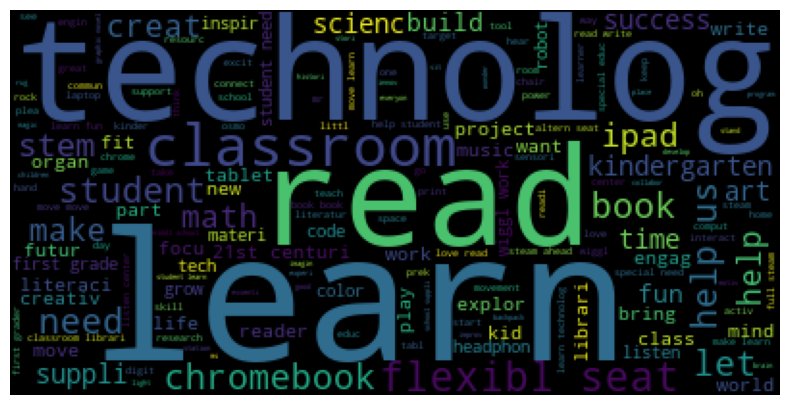

In [35]:
# Generating word cloud for project title clean
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(max_font_size=None, stopwords=None, background_color='black',).generate((' ').join(proj_title_corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**We want to generate a score against each word such that:**

- If word is explicitly present in rejected vocabulary, score will be high and positive
- If word is common to both rejected & approved vocabularies, score will be close to zero
- If word is explicitly present in approved vocabulary, score will be high and negative

In [36]:
def exclusive_pop_words_rej(df, col):
    

    # Rejected submissions: Generate corpus
    rej_corpus = []
    for lst in df.loc[df['project_is_approved']==0, col].str.split():
        rej_corpus += lst
    
    # Rejected submissions: Generate probability for each word in vocabulary
    rej_vocab = Counter(rej_corpus)
    rej_vocab = pd.Series(rej_vocab).sort_values(ascending=False)
    rej_vocab_prob = rej_vocab/rej_vocab.sum()
    
    
    # Accepted submissions: Generate corpus
    acc_corpus = []
    for lst in df.loc[df['project_is_approved']==1, col].str.split():
        acc_corpus += lst
    
    # Accepted submissions: Generate probability for each word in vocabulary
    acc_vocab = Counter(acc_corpus)
    acc_vocab = pd.Series(acc_vocab).sort_values(ascending=False)
    acc_vocab_prob = acc_vocab/acc_vocab.sum()
    
    
    
    # We want to generate a score against each word such that:
        # ser1 = rej_vocab_prob, ser2 = acc_vocab_prob
        # If word is explicitly present in ser1, score will be high and positive
        # If word is common to both ser1 & ser2, score will be close to zero
        # If word is explicitly present in ser2, score will be high and negative
    
    
    dict1 = dict(zip(rej_vocab_prob.index, rej_vocab_prob.values))
    dict2 = dict(zip(acc_vocab_prob.index, acc_vocab_prob.values))
    
    tokens = {}
    
    for key1 in dict1:
        if key1 in dict2:
            tokens[key1] = round(dict1[key1] - dict2[key1], 6) # tokens common to both series: ser1 & ser2
        else:
            tokens[key1] = dict1[key1] # tokens explicitly in ser1: prob of ser1(word)
    
    for key2 in dict2:
        if key2 not in dict1:
            tokens[key2] = -dict2[key2]  # tokens explicitly in ser2: prob of ser2(word)

    tokens = pd.Series(tokens)
    tokens = pd.Series(tokens).sort_values(ascending=False)
    tokens_prob = tokens/tokens.sum()
    
    
    return tokens_prob   

exclusive_pop_words_rej_title = exclusive_pop_words_rej(df_text1, 'project_title_cln')
exclusive_pop_words_rej_title

suppli        23.852721
math          17.039800
stem          14.355619
flexibl       14.155680
scienc        13.170981
                ...    
wobbl        -11.786403
wiggl        -13.865769
ipad         -13.870767
chromebook   -23.657781
book         -29.560979
Length: 14597, dtype: float64

**Feature 'title_rej_scr':**

- Keep a count of all such words present in the project title which are popular words explicitly present in rejected vocabulary
- Feature will store the ratio of count of such words to total words

In [37]:
def adv_feat_title_rej_scr(row, rej_corpus):
    
    # Split into tokens
    text = row['project_title_cln']
    tokens = text.split()
    
    if len(tokens)==0:
        return 0
    
    # Number of exclusive & popular words from rejected submissions
    count = sum([1 for tkn in tokens if tkn in rej_corpus])
    
    count /= len(tokens)
    
    return count 

# Creating feature (Limiting rejected vocabulary to the top 3000 most popular words present in rejected submissions)
df_text1['title_rej_scr'] = df_text1.apply(lambda x: adv_feat_title_rej_scr(x, exclusive_pop_words_rej_title.iloc[:3000].index), axis=1)

### **EDA:**

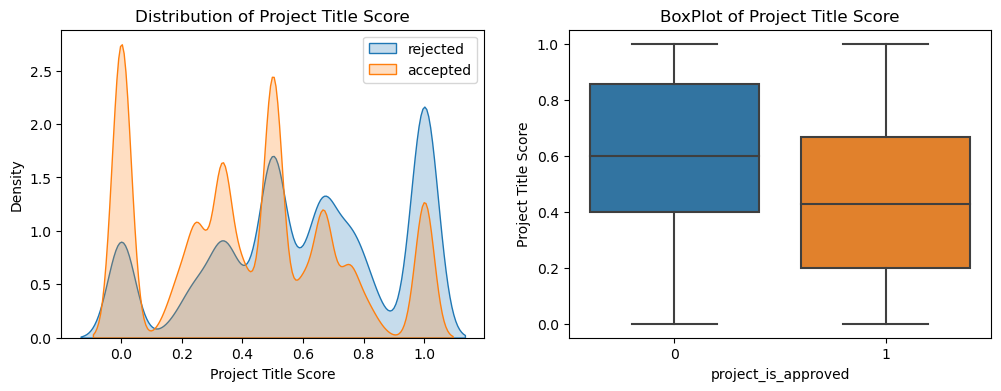

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x='project_title_scr3', bins=10, kde=True)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x='project_title_scr3', bins=10, kde=True)
sns.kdeplot(data=df_text1.loc[df_text1['project_is_approved']==0], x='title_rej_scr', label='rejected', fill=True)
sns.kdeplot(data=df_text1.loc[df_text1['project_is_approved']==1], x='title_rej_scr', label='accepted', fill=True)
plt.xlabel('Project Title Score')
plt.title('Distribution of Project Title Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df_text1, y='title_rej_scr', x='project_is_approved')
plt.ylabel('Project Title Score')
plt.title('BoxPlot of Project Title Score')
plt.show()

In [39]:
df_text1.head(2)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   

                                      project_title  project_is_approved  \
0  Educational Support for English Learners at Home                    0   
1             Wanted: Projector for Hungry Learners                    1   

   title_emoj  title_emot  title_punc  title_capwords  title_capwords_r  \
0           0           0           0               0               0.0   
1           0           0           1               0               0.0   

   title_words  title_chars  title_chars_r  title_stopwords  \
0            7           48          6.857                2   
1            5           36          7.200                1   

   title_nonstopwords  title_stopwords_r  \
0                   5              0.286   
1                   4              0.200   

                                  project_title_pp1  \
0  educational support for english learners at home   
1              wanted projector for hungry learners   

                   project_title_cln  title_rej_scr  
0  educ support english learner home            0.6  
1      want projector hungri learner            0.0

# **Project Essays**

Note: Prior to May 17, 2016, the prompts for the essays were as follows:
- project_essay_1: "Introduce us to your classroom"
- project_essay_2: "Tell us more about your students"
- project_essay_3: "Describe how your students will use the materials you're requesting"
- project_essay_4: "Close by sharing why your project will make a difference"

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:
- project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
- project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"
- For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

In [40]:
df_eda1['project_submitted_datetime'] = pd.to_datetime(df_eda1['project_submitted_datetime'])
df_eda1['dos'] = df_eda1['project_submitted_datetime'].dt.date.astype('str')

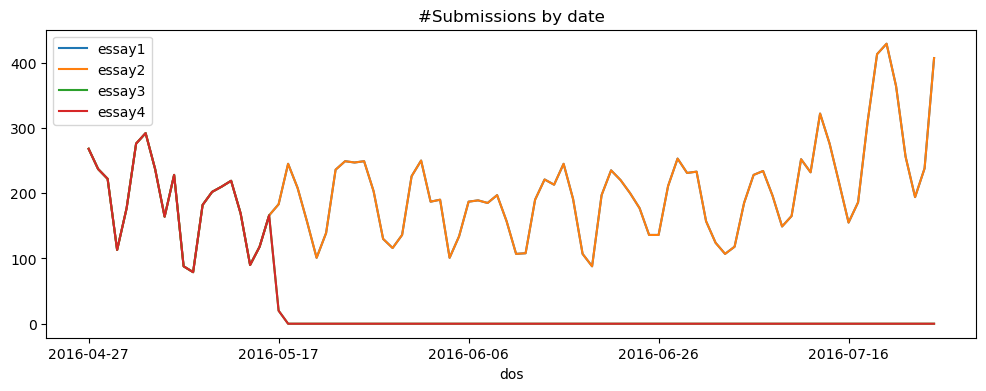

In [212]:
plt.figure(figsize=(12, 4))
df_eda1.groupby('dos')['project_essay_1'].count().iloc[:90].plot(label='essay1')
df_eda1.groupby('dos')['project_essay_2'].count().iloc[:90].plot(label='essay2')
df_eda1.groupby('dos')['project_essay_3'].count().iloc[:90].plot(label='essay3')
df_eda1.groupby('dos')['project_essay_4'].count().iloc[:90].plot(label='essay4')
plt.legend()
plt.title('#Submissions by date')
plt.show()

**Observations:** 

- We see that from 17th May, 2016, the #essays per submission reduced from 4 to 2
- The #samples (and %s) before and after 17th May, 2016 is show below.
- As seen from the below data only ~3.5% samples in our data are before 17th may, 2016

In [42]:
print('#Submissions before 17th May, 2016:', df_eda1.loc[df_eda1['dos']<'2016-05-17', 'id'].count())
print('#Submissions on & after 17th May, 2016:', df_eda1.loc[df_eda1['dos']>='2016-05-17', 'id'].count())
print('-'*50)
print('#Submissions before 17th May, 2016:', round(100*df_eda1.loc[df_eda1['dos']<'2016-05-17', 'id'].count()/df_eda1.shape[0], 2))
print('#Submissions on & after 17th May, 2016:', round(100*df_eda1.loc[df_eda1['dos']>='2016-05-17', 'id'].count()/df_eda1.shape[0], 2))

#Submissions before 17th May, 2016: 3737
#Submissions on & after 17th May, 2016: 105508
--------------------------------------------------
#Submissions before 17th May, 2016: 3.42
#Submissions on & after 17th May, 2016: 96.58


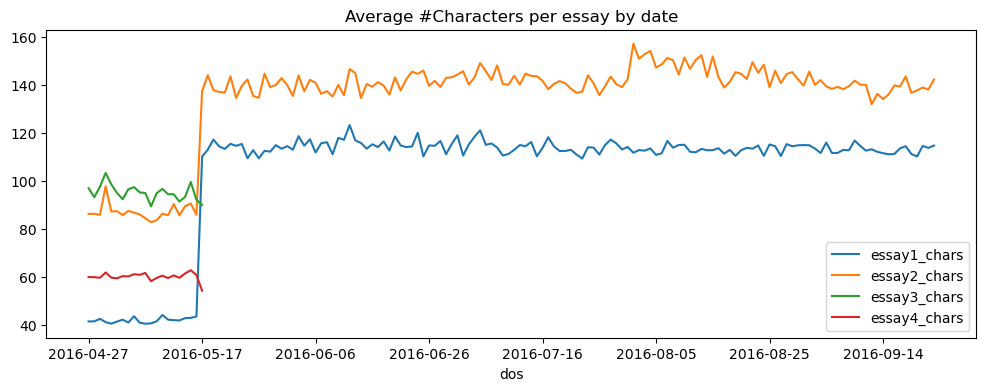

In [43]:
df_eda1['project_essay1_words'] = df_eda1['project_essay_1'].str.split().str.len()
df_eda1['project_essay2_words'] = df_eda1['project_essay_2'].str.split().str.len()
df_eda1['project_essay3_words'] = df_eda1['project_essay_3'].str.split().str.len()
df_eda1['project_essay4_words'] = df_eda1['project_essay_4'].str.split().str.len()

plt.figure(figsize=(12, 4))
df_eda1.groupby('dos')['project_essay1_words'].mean().iloc[:150].plot(label='essay1_chars')
df_eda1.groupby('dos')['project_essay2_words'].mean().iloc[:150].plot(label='essay2_chars')
df_eda1.groupby('dos')['project_essay3_words'].mean().iloc[:150].plot(label='essay3_chars')
df_eda1.groupby('dos')['project_essay4_words'].mean().iloc[:150].plot(label='essay4_chars')
plt.legend(loc='lower right')
plt.title('Average #Characters per essay by date')
plt.show()

## **Handling Missing entries**

There are many ways to handle the above situation
- Option1: Get rid of the columns essay3, essay4
- Option2: Get rid of the samples where essay3 and essay4 are present (~3% of total samples)
- Option3: Train seperate models for dates before & after 17th May, 2016 
- Option4: Smart combination of the project_essay columns

We will chhose Option4 since it is the least destructive in terms of data loss and most efficient in terms of training
- From the project prompts it makes sense to do the following. 
- Before 17th May, 2016: Combine old1 + old2 as new1 and old3 + old4 as new2
- From 17th May, 2016: new1 = old1 and new2 = old2

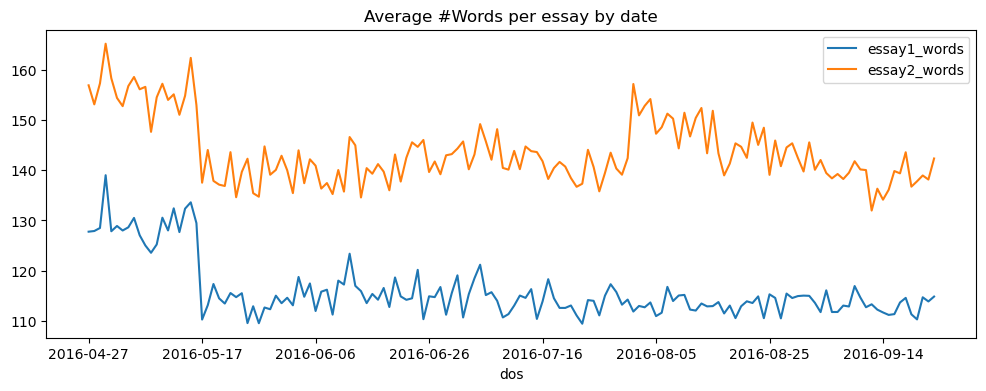

In [44]:
# Handling the case on & after 17th May, 2016
df_eda1['proj_essay1'] = df_eda1['project_essay_1']
df_eda1['proj_essay2'] = df_eda1['project_essay_2']

# Handling the case before 17th May, 2016
df_eda1.loc[df_eda1['dos']<'2016-05-17', 'proj_essay1'] = df_eda1.loc[df_eda1['dos']<'2016-05-17', 'project_essay_1'] + \
                                                          ' ' + \
                                                          df_eda1.loc[df_eda1['dos']<'2016-05-17', 'project_essay_2']
        

df_eda1.loc[df_eda1['dos']<'2016-05-17', 'proj_essay2'] = df_eda1.loc[df_eda1['dos']<'2016-05-17', 'project_essay_3'] + \
                                                          ' ' + \
                                                          df_eda1.loc[df_eda1['dos']<'2016-05-17', 'project_essay_4']    
        
        

df_eda1['proj_essay1_words'] = df_eda1['proj_essay1'].str.split().str.len()
df_eda1['proj_essay2_words'] = df_eda1['proj_essay2'].str.split().str.len()
        
plt.figure(figsize=(12, 4))
df_eda1.groupby('dos')['proj_essay1_words'].mean().iloc[:150].plot(label='essay1_words')
df_eda1.groupby('dos')['proj_essay2_words'].mean().iloc[:150].plot(label='essay2_words')
plt.legend()
plt.title('Average #Words per essay by date')
plt.show()

In [45]:
df_text2 = df_eda1[['id', 'teacher_id', 
                    'proj_essay1', 'proj_essay2', 
                    'project_is_approved']].copy()
df_text2.head()

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3  p246581  f3cb9bffbba169bef1a77b243e620b60   
4  p104768  be1f7507a41f8479dc06f047086a39ec   

                                         proj_essay1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                         proj_essay2  project_is_approved  
0  \"The limits of your language are the limits o...                    0  
1  The projector we need for our school is very c...                    1  
2  The students on the campus come to school know...                    0  
3  My students live in high poverty conditions wi...                    1  
4  For many students, math is a subject that does...                    1

## **Project Essay1**

In [46]:
# Checking a few essays
print(df_text2['proj_essay1'].iloc[10])
print('-'*50)
print(df_text2['proj_essay1'].iloc[100])
print('-'*50)
print(df_text2['proj_essay1'].iloc[1000])

\"There are many little ways to enlarge your world. Love of books is the best of all.” - Jacqueline Kennedy\r\n\r\nI work at a Title 1 school which serves students of lower income families.\r\nThey often enter 5th grade reading at a second grade level with the notion that reading is just another thing they're not good at. I provide them with the motivation to want to pick up a book, snuggle up on a bean bag, and read more than they ever have in their lifetime.
--------------------------------------------------
I teach in a dual immersion 4th grade classroom. We teach 50% of the day in English and 50% in Spanish. My classroom is the English model for two classrooms of 30 students. Half of the 4th grade students at my school come to me to learn science, writing, and math in English in the morning, and the other 1/2 come to me in the afternoon to learn the same subjects.  Most of my students are English Learners; however, many come to this school speaking English only. This school is a Ti

### **Duplicate Check**

In [47]:
# Duplicates in proj_essay1
df_text2.groupby(['proj_essay1'])[['id']].count().value_counts()

id
1     84354
2      7265
3      1674
4       579
5       219
6       106
7        67
8        35
9        14
11       12
12        7
10        3
13        2
14        2
15        2
16        1
18        1
21        1
32        1
dtype: int64

#### **Checking Approval ratings of submissions: duplicate vs non-duplicate proj_essay1**

In [48]:
df_text2['ess1_count_pid'] = df_text2.groupby(['proj_essay1'])[['id']].transform(lambda x: x.count())
df_text2.head(3)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0   

                                         proj_essay1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                         proj_essay2  project_is_approved  \
0  \"The limits of your language are the limits o...                    0   
1  The projector we need for our school is very c...                    1   
2  The students on the campus come to school know...                    0   

   ess1_count_pid  
0               1  
1               4  
2               1

In [49]:
print('Approval rate of submissions having non duplicate essays')
print(df_text2.loc[df_text2['ess1_count_pid']==1, 'project_is_approved'].value_counts(normalize=True))
print('-'*75)
print('Approval rate of submissions having duplicate essays')
print(df_text2.loc[df_text2['ess1_count_pid']>1, 'project_is_approved'].value_counts(normalize=True))

Approval rate of submissions having non duplicate essays
1    0.839877
0    0.160123
Name: project_is_approved, dtype: float64
---------------------------------------------------------------------------
Approval rate of submissions having duplicate essays
1    0.878068
0    0.121932
Name: project_is_approved, dtype: float64


### **PreProcessing: Version1**

In [50]:
def preprocess1_essay(text):
    
    # Replace certain special characters with their string equivalents
    text1 = text.strip()
    text1 = text1.replace('%', ' percent')
    text1 = text1.replace('$', ' dollar ')
    text1 = text1.replace('₹', ' rupee ')
    text1 = text1.replace('€', ' euro ')
    text1 = text1.replace('@', ' at ')
    text1 = text1.replace('title i', 'title 1')
    
    # Handle escape sequences
    text2 = re.sub(r'\\[nrt]', ' ', text1)
    # print(text2)
    
    # HTML tags & Obvious pattern removals (eg. url, emailID) --> Not required here
    # bs = BeautifulSoup(text2)
    # text3 = bs.get_text()
    
    
    # Sentence tokenizer
    sentences = sent_tokenize(text2)
    # print(sentences)
    
    
    processed_sentences = []
    for sentence in sentences:
        # Remove all punctuation except for sentence delimiters
        sentence = re.sub(r'[^\w\s\.\?\!]', '', sentence)
        # print(sentence)
        # Converting uppercase letter at sentence start to lowercase
        if len(sentence)>0:
            sentence_copy = sentence[:]
            sentence = sentence_copy[0].lower() + sentence_copy[1:]
        processed_sentences.append(sentence)
    
    text4 = (' ').join(processed_sentences)
    
    return text4

In [51]:
df_text2['proj_essay1'].iloc[1000]
# df_text2['proj_essay1'].iloc[518]
# df_text2['proj_essay1'].iloc[3684]

'How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.\\r\\n\\r\\nMy class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.\\r\\nThey attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an \\"open classroom\\" concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.'

In [52]:
preprocess1_essay(df_text2['proj_essay1'].iloc[1000])
# preprocess1_essay(df_text2['proj_essay1'].iloc[518])
# preprocess1_essay(df_text2['proj_essay1'].iloc[3684])

'how do you remember your days of school? was it in a sterile environment with plain walls rows of desks and a teacher in front of the room? a typical day in our room is nothing like that. i work hard to create a warm inviting themed room for my students look forward to coming to each day. my class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas. they attend a Title I school which means there is a high enough percentage of free and reducedprice lunch to qualify. our school is an open classroom concept which is very unique as there are no walls separating the classrooms. these 9 and 10 yearold students are very eager learners they are like sponges absorbing all the information and experiences and keep on wanting more.'

In [53]:
# Applying preprocess1_essay to df_text2['proj_essay1']
df_text2['proj_essay1_pp1'] = df_text2['proj_essay1'].progress_apply(preprocess1_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Capital words counter**

In [54]:
# Capwords Features
# Capitalized Words
# Capitalized Words/Words

In [55]:
def naive_feature_essay_capwords(row, col):
    
    capwords_features = [0.0]*2
    
    text = row[col]
    
    # Counting total words
    total_words = len(text.split())
    
    # Ignore words of length=1
    trunc_word_lst = list(filter(lambda x: True if len(x)>1 else False, text.split()))
    
    # Count words that are capitalized
    cap_words = sum([1 if word[0].isupper() else 0 for word in trunc_word_lst])
    
    capwords_features[0] = cap_words # Number of cap words
    capwords_features[1] = round(cap_words/total_words, 3) # Ratio: cap words/total words
    
    return capwords_features

In [56]:
df_text2['proj_essay1_pp1'].iloc[100]

'i teach in a dual immersion 4th grade classroom. we teach 50 percent of the day in English and 50 percent in Spanish. my classroom is the English model for two classrooms of 30 students. half of the 4th grade students at my school come to me to learn science writing and math in English in the morning and the other 12 come to me in the afternoon to learn the same subjects. most of my students are English Learners however many come to this school speaking English only. this school is a Title I school and is located in a high poverty area where many of the families are farm workers. we continually discuss how to implement the 4 Cs into our lessons collaboration communication critical thinking and creativity. we also never forget about the 5th and most important C which is CARING! i have a great bunch of students who are enthusiastic about learning and reading. most importantly my students are so grateful for any help that we may receive. i really have a great group of kids who are so swe

In [57]:
naive_feature_essay_capwords(df_text2.iloc[100], 'proj_essay1_pp1')

[10, 0.054]

In [58]:
proj_essay1_capwords_features = df_text2.progress_apply(lambda x: naive_feature_essay_capwords(x, 'proj_essay1_pp1'), axis=1)

# Creating the capword features
df_text2['ess1_capwords'] = list(map(lambda x: x[0], proj_essay1_capwords_features))
df_text2['ess1_capwords_r'] = list(map(lambda x: x[1], proj_essay1_capwords_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

### **PreProcessing: Version2**

In [59]:
def preprocess2_essay(text):
    
    # Dictionary of contractions
    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }
    
    
    
    # Lowercasing and basic preprocess
    text1 = text.lower().strip()
    
    # Data specific fixes
    text1 = text1.replace('title i', 'title 1')


    # Decontracting words and removing extra white space  
    text2 = []
    for word in text1.split(): 
        word=word.strip()
        if word in contractions:
            decontracted_word = contractions[word]
        else:
            decontracted_word = word
        text2.append(decontracted_word)
    text2 = (' ').join(text2)
    
    
    return text2

In [60]:
df_text2['proj_essay1_pp1'].iloc[10]

'there are many little ways to enlarge your world. love of books is the best of all.  Jacqueline Kennedy    I work at a Title 1 school which serves students of lower income families. they often enter 5th grade reading at a second grade level with the notion that reading is just another thing theyre not good at. i provide them with the motivation to want to pick up a book snuggle up on a bean bag and read more than they ever have in their lifetime.'

In [61]:
preprocess2_essay(df_text2['proj_essay1_pp1'].iloc[10])

'there are many little ways to enlarge your world. love of books is the best of all. jacqueline kennedy i work at a title 1 school which serves students of lower income families. they often enter 5th grade reading at a second grade level with the notion that reading is just another thing theyre not good at. i provide them with the motivation to want to pick up a book snuggle up on a bean bag and read more than they ever have in their lifetime.'

In [62]:
# Applying preprocess2_essay to df_text2['proj_essay1']
df_text2['proj_essay1_pp2'] = df_text2['proj_essay1_pp1'].progress_apply(preprocess2_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Naive Token Features**

In [63]:
# Naive Token Features
# Sentences
# Words
# Characters
# Words/Sentence
# Characters/Word
# Stop Words
# Non Stop Words
# Stop Words/Words
# #Questions used
# #Excalmations used

In [64]:
def naive_features_essay_token(row, col):

    # Stop words
    stop_words_eng = stopwords.words('english')
    
    token_features = [0.0]*10
    
    # Retrieve essay1 into a variable called text
    text = row[col]
    
    # Generate sentence list
    sentences = sent_tokenize(text)
    # print(sentences)
    
    # Generate word list
    words = []
    for sent in sentences:
        words.extend(sent.split())
    # print(words)
    
    
    # Estimate the count of question marks and exclamations used
    question_counter = 0
    exclamation_counter = 0
    question_counter = np.array(['?' in wrd for wrd in words]).sum()
    exclamation_counter = np.array(['!' in wrd for wrd in words]).sum()
    # print(question_counter, exclamation_counter)
    
    # Get rid of specific delimitters in words:' .?!'
    words = [wrd.strip(' .?!') for wrd in words]
    # print(words)
    
    
    # Stopword count
    stop_words = [word for word in words if word in stop_words_eng]
    
    # Non-Stop count
    nonstop_words = [word for word in words if word not in stop_words_eng]
    
    
    token_features[0] = len(sentences) # Number of sentences
    token_features[1] = len(words) # Number of words
    token_features[2] = len(text) # Number of characters
    token_features[3] = round(len(words)/len(sentences), 3) # Ratio: words/sentences
    token_features[4] = round(len(text)/len(words), 3) # Ratio: characters/words
    token_features[5] = len(stop_words) # Number of stop words
    token_features[6] = len(nonstop_words) # Number of non stop words
    token_features[7] = round(len(stop_words)/len(words), 3) # Ratio: stop words/words
    token_features[8] = question_counter # Number of question marks
    token_features[9] = exclamation_counter # Number of exclamation marks

    return token_features

In [65]:
df_text2['proj_essay1'].iloc[1000]

'How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.\\r\\n\\r\\nMy class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.\\r\\nThey attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an \\"open classroom\\" concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.'

In [66]:
naive_features_essay_token(df_text2.iloc[1000], 'proj_essay1_pp2')

[8, 140, 755, 17.5, 5.393, 68, 72, 0.486, 2, 0]

In [67]:
proj_essay1_naive_token_features = df_text2.progress_apply(lambda x: naive_features_essay_token(x, 'proj_essay1_pp2'), axis=1)

# Creating the naive token features for essay
df_text2['ess1_sents'] = list(map(lambda x: x[0], proj_essay1_naive_token_features))
df_text2['ess1_words'] = list(map(lambda x: x[1], proj_essay1_naive_token_features))
df_text2['ess1_chars'] = list(map(lambda x: x[2], proj_essay1_naive_token_features))
df_text2['ess1_word_sent_r'] = list(map(lambda x: x[3], proj_essay1_naive_token_features))
df_text2['ess1_char_word_r'] = list(map(lambda x: x[4], proj_essay1_naive_token_features))
df_text2['ess1_stopwords'] = list(map(lambda x: x[5], proj_essay1_naive_token_features))
df_text2['ess1_nonstopwords'] = list(map(lambda x: x[6], proj_essay1_naive_token_features))
df_text2['ess1_stopwords_r'] = list(map(lambda x: x[7], proj_essay1_naive_token_features))
df_text2['ess1_ques_mark'] = list(map(lambda x: x[8], proj_essay1_naive_token_features))
df_text2['ess1_excl_mark'] = list(map(lambda x: x[9], proj_essay1_naive_token_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

In [68]:
ess1_cols= ['ess1_capwords', 'ess1_capwords_r', 
            'ess1_sents', 'ess1_words', 'ess1_chars', 
            'ess1_word_sent_r', 'ess1_char_word_r', 
            'ess1_stopwords', 'ess1_nonstopwords', 'ess1_stopwords_r', 
            'ess1_ques_mark', 'ess1_excl_mark']

In [69]:
# col_lst = ess1_cols[:]
# r = len(col_lst)

# plt.figure(figsize=(12, 4*r+10))

# i = 1
# for col in col_lst:
    
#     plt.subplot(r, 2, i)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, bins=10, kde=True)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, bins=10, kde=True)
#     sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==0], x=col, label='rejected', fill=True)
#     sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==1], x=col, label='accepted', fill=True)
#     plt.xlabel(f'{col}')
#     plt.title(f'Distribution of {col}')
#     plt.legend()

#     plt.subplot(r, 2, i+1)
#     sns.boxplot(data=df_text2, y=col, x='project_is_approved')
#     plt.ylabel(f'{col}')
#     plt.title(f'BoxPlot of {col}')

#     i += 2


# plt.show()    

### **PreProcessing: Version3**

In [70]:
def preprocess_remove_stop_stem_essay(text):
    
    # Stop words
    stop_words_eng = stopwords.words('english')
    
    # Removing all punctuations
    punctuation_set = set(string.punctuation)
    text1 = ''.join([char for char in text if char not in punctuation_set])
    
    # Remove stop words
    text2 = (' ').join([word if word not in stop_words_eng else '' for word in text1.split()])
    
    
    # Stemming
    ps = PorterStemmer()
    text3 = (' ').join([ps.stem(word.strip()) for word in text2.split()])
    
    return text3

In [71]:
start_time = time.time()
df_text2['proj_essay1_pp2'].iloc[:1000].apply(preprocess_remove_stop_stem_essay)
end_time = time.time()
print(end_time-start_time)

0.6866879463195801


In [72]:
# Applying preprocess_remove_stop_stem_essay to df_text2['proj_essay1']
df_text2['proj_essay1_cln'] = df_text2['proj_essay1_pp2'].progress_apply(preprocess_remove_stop_stem_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Advanced FE: Essay1 Rejection Score**

In [73]:
def exclusive_pop_words_rej(df, col):
    

    # Rejected submissions: Generate corpus
    rej_corpus = []
    for lst in df.loc[df['project_is_approved']==0, col].str.split():
        rej_corpus += lst
    
    # Rejected submissions: Generate probability for each word in vocabulary
    rej_vocab = Counter(rej_corpus)
    rej_vocab = pd.Series(rej_vocab).sort_values(ascending=False)
    rej_vocab_prob = rej_vocab/rej_vocab.sum()
    
    
    # Accepted submissions: Generate corpus
    acc_corpus = []
    for lst in df.loc[df['project_is_approved']==1, col].str.split():
        acc_corpus += lst
    
    # Accepted submissions: Generate probability for each word in vocabulary
    acc_vocab = Counter(acc_corpus)
    acc_vocab = pd.Series(acc_vocab).sort_values(ascending=False)
    acc_vocab_prob = acc_vocab/acc_vocab.sum()
    
    
    
    # We want to generate a score against each word such that:
        # ser1 = rej_vocab_prob, ser2 = acc_vocab_prob
        # If word is explicitly present in ser1, score will be high and positive
        # If word is common to both ser1 & ser2, score will be close to zero
        # If word is explicitly present in ser2, score will be high and negative
    
    
    dict1 = dict(zip(rej_vocab_prob.index, rej_vocab_prob.values))
    dict2 = dict(zip(acc_vocab_prob.index, acc_vocab_prob.values))
    
    tokens = {}
    
    for key1 in dict1:
        if key1 in dict2:
            tokens[key1] = round(dict1[key1] - dict2[key1], 6) # tokens common to both series: ser1 & ser2
        else:
            tokens[key1] = dict1[key1] # tokens explicitly in ser1: prob of ser1(word)
    
    for key2 in dict2:
        if key2 not in dict1:
            tokens[key2] = -dict2[key2]  # tokens explicitly in ser2: prob of ser2(word)

    tokens = pd.Series(tokens)
    tokens = pd.Series(tokens).sort_values(ascending=False)
    tokens_prob = tokens/tokens.sum()
    
    
    return tokens_prob   

exclusive_pop_words_rej_essay1 = exclusive_pop_words_rej(df_text2, 'proj_essay1_cln')
exclusive_pop_words_rej_essay1

help          6.582576
suppli        4.050816
need          4.028312
educ          3.499455
special       3.431942
               ...    
student      -7.415244
day          -7.741560
technolog    -9.463157
school      -11.499817
read        -11.556079
Length: 33109, dtype: float64

In [74]:
def adv_feat_essay_rej_scr(row, col, rej_corpus):
    
    # Split into tokens
    text = row[col]
    tokens = text.split()
    
    if len(tokens)==0:
        return 0
    
    # Number of exclusive & popular words from rejected submissions
    count = sum([1 for tkn in tokens if tkn in rej_corpus])
    
    count /= len(tokens)
    
    return count 

# Creating feature (Limiting rejected vocabulary to the top 1000 most popular words present in rejected submissions)
df_text2['ess1_rej_scr'] = df_text2.progress_apply(lambda x: adv_feat_essay_rej_scr(x, 'proj_essay1_cln', 
                                                                                    exclusive_pop_words_rej_essay1.iloc[:9000].index), axis=1)

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

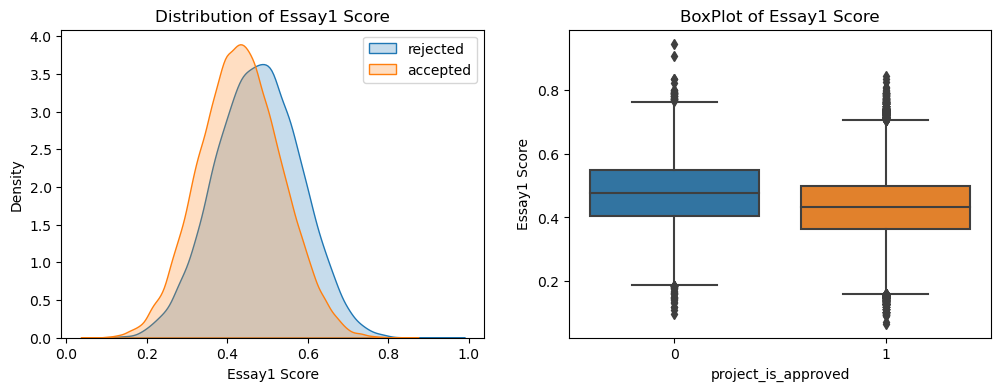

In [75]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x='project_title_scr3', bins=10, kde=True)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x='project_title_scr3', bins=10, kde=True)
sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==0], x='ess1_rej_scr', label='rejected', fill=True)
sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==1], x='ess1_rej_scr', label='accepted', fill=True)
plt.xlabel('Essay1 Score')
plt.title('Distribution of Essay1 Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df_text2, y='ess1_rej_scr', x='project_is_approved')
plt.ylabel('Essay1 Score')
plt.title('BoxPlot of Essay1 Score')
plt.show()

## **Project Essay2**

In [76]:
# Checking a few essays
print(df_text2['proj_essay2'].iloc[10])
print('-'*50)
print(df_text2['proj_essay2'].iloc[100])
print('-'*50)
print(df_text2['proj_essay2'].iloc[1000])

I've had 8 sets of students enjoy the books in our classroom library throughout the past few years, and as a result most of them are falling apart. It is a testament to how much they have loved reading but unfortunately the books will soon need to be retired. With the purchase of these new books, you will ensure that the joy of reading continues on past this school year. A Haunted Mystery Series, Word of Mouse, and The Babysitters Club are just a few books my students would love to read. \r\n\r\nMy students struggle with building their vocabulary and by the time they reach 5th grade, most of them have no interest in picking up a book.\r\n\r\nI am determined to change their futures through sharing the joy of reading. Reading allows them to make connections beyond their own limited world and gives them a gateway to limitless opportunities. Your donations will help improve our classroom library and will be tangible evidence to my students that I'm not the only one who thinks reading chang

### **Duplicate Check**

In [77]:
# Duplicates in proj_essay2: Not many essays are duplicates here
df_text2.groupby(['proj_essay2'])[['id']].count().value_counts()

id
1     108530
2        266
3         46
4          5
5          2
15         1
dtype: int64

### **PreProcessing: Version1**

In [78]:
# Applying preprocess1_essay to df_text2['proj_essay2']
df_text2['proj_essay2_pp1'] = df_text2['proj_essay2'].progress_apply(preprocess1_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Capital Words counter**

In [79]:
proj_essay2_capwords_features = df_text2.progress_apply(lambda x: naive_feature_essay_capwords(x, 'proj_essay2_pp1'), axis=1)

# Creating the capword features
df_text2['ess2_capwords'] = list(map(lambda x: x[0], proj_essay2_capwords_features))
df_text2['ess2_capwords_r'] = list(map(lambda x: x[1], proj_essay2_capwords_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

### **PreProcessing: Version2**

In [80]:
# Applying preprocess2_essay to df_text2['proj_essay2']
df_text2['proj_essay2_pp2'] = df_text2['proj_essay2_pp1'].progress_apply(preprocess2_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Naive Token Features**

In [81]:
proj_essay2_naive_token_features = df_text2.progress_apply(lambda x: naive_features_essay_token(x, 'proj_essay2_pp2'), axis=1)

# Creating the naive token features for essay
df_text2['ess2_sents'] = list(map(lambda x: x[0], proj_essay2_naive_token_features))
df_text2['ess2_words'] = list(map(lambda x: x[1], proj_essay2_naive_token_features))
df_text2['ess2_chars'] = list(map(lambda x: x[2], proj_essay2_naive_token_features))
df_text2['ess2_word_sent_r'] = list(map(lambda x: x[3], proj_essay2_naive_token_features))
df_text2['ess2_char_word_r'] = list(map(lambda x: x[4], proj_essay2_naive_token_features))
df_text2['ess2_stopwords'] = list(map(lambda x: x[5], proj_essay2_naive_token_features))
df_text2['ess2_nonstopwords'] = list(map(lambda x: x[6], proj_essay2_naive_token_features))
df_text2['ess2_stopwords_r'] = list(map(lambda x: x[7], proj_essay2_naive_token_features))
df_text2['ess2_ques_mark'] = list(map(lambda x: x[8], proj_essay2_naive_token_features))
df_text2['ess2_excl_mark'] = list(map(lambda x: x[9], proj_essay2_naive_token_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

In [82]:
ess2_cols= ['ess2_capwords', 'ess2_capwords_r', 
            'ess2_sents', 'ess2_words', 'ess2_chars', 
            'ess2_word_sent_r', 'ess2_char_word_r', 
            'ess2_stopwords', 'ess2_nonstopwords', 'ess2_stopwords_r', 
            'ess2_ques_mark', 'ess2_excl_mark']

In [83]:
# col_lst = ess2_cols[:]
# r = len(col_lst)

# plt.figure(figsize=(12, 4*r+10))

# i = 1
# for col in col_lst:
    
#     plt.subplot(r, 2, i)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, bins=10, kde=True)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, bins=10, kde=True)
#     sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==0], x=col, label='rejected', fill=True)
#     sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==1], x=col, label='accepted', fill=True)
#     plt.xlabel(f'{col}')
#     plt.title(f'Distribution of {col}')
#     plt.legend()

#     plt.subplot(r, 2, i+1)
#     sns.boxplot(data=df_text2, y=col, x='project_is_approved')
#     plt.ylabel(f'{col}')
#     plt.title(f'BoxPlot of {col}')

#     i += 2


# plt.show() 

### **PreProcessing: Version3**

In [84]:
# Applying preprocess_remove_stop_stem_essay to df_text2['proj_essay2']
df_text2['proj_essay2_cln'] = df_text2['proj_essay2_pp2'].progress_apply(preprocess_remove_stop_stem_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Advanced FE: Essay2 Rejection Score**

In [85]:
exclusive_pop_words_rej_essay2 = exclusive_pop_words_rej(df_text2, 'proj_essay2_cln')
exclusive_pop_words_rej_essay2

materi        33.025992
learn         31.926665
suppli        18.078844
school        15.870952
want           8.443568
                ...    
chromebook   -11.279646
ipad         -11.713834
read         -24.157474
use          -25.136706
book         -30.818100
Length: 45442, dtype: float64

In [86]:
# Creating feature (Limiting rejected vocabulary to the top 1000 most popular words present in rejected submissions)
df_text2['ess2_rej_scr'] = df_text2.progress_apply(lambda x: adv_feat_essay_rej_scr(x, 'proj_essay2_cln', 
                                                                                    exclusive_pop_words_rej_essay2.iloc[:10000].index), axis=1)

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

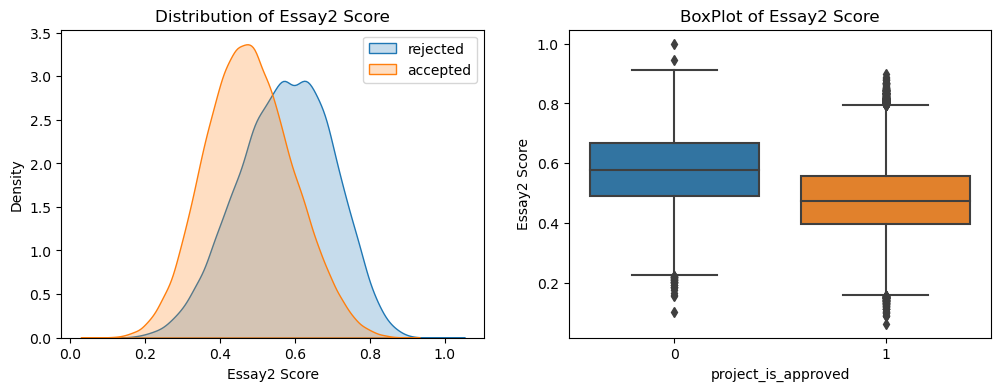

In [87]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x='project_title_scr3', bins=10, kde=True)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x='project_title_scr3', bins=10, kde=True)
sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==0], x='ess2_rej_scr', label='rejected', fill=True)
sns.kdeplot(data=df_text2.loc[df_text2['project_is_approved']==1], x='ess2_rej_scr', label='accepted', fill=True)
plt.xlabel('Essay2 Score')
plt.title('Distribution of Essay2 Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df_text2, y='ess2_rej_scr', x='project_is_approved')
plt.ylabel('Essay2 Score')
plt.title('BoxPlot of Essay2 Score')
plt.show()

In [88]:
df_text2.head(2)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   

                                         proj_essay1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                         proj_essay2  project_is_approved  \
0  \"The limits of your language are the limits o...                    0   
1  The projector we need for our school is very c...                    1   

   ess1_count_pid                                    proj_essay1_pp1  \
0               1  my students are English learners that are work...   
1               4  our students arrive to our school eager to lea...   

   ess1_capwords  ess1_capwords_r  \
0              5            0.057   
1              0            0.000   

                                     proj_essay1_pp2  ...  ess2_chars  \
0  my students are english learners that are work...  ...        1056   
1  our students arrive to our school eager to lea...  ...         813   

   ess2_word_sent_r  ess2_char_word_r  ess2_stopwords  ess2_nonstopwords  \
0            20.778             5.647              90                 97   
1            19.571             5.934              73                 64   

   ess2_stopwords_r  ess2_ques_mark  ess2_excl_mark  \
0             0.481               0               0   
1             0.533               0               0   

                                     proj_essay2_cln  ess2_rej_scr  
0  limit languag limit worldludwig wittgenstein e...      0.546392  
1  projector need school crucial academ improv st...      0.531250  

[2 rows x 38 columns]

## **Similarity based Features on Essay1 & Essay2**

In [89]:
df_text3 = df_text2[['id', 'project_is_approved', 'proj_essay1_cln', 'proj_essay2_cln']].copy()
df_text3.head()

id  project_is_approved  \
0  p253737                    0   
1  p258326                    1   
2  p182444                    0   
3  p246581                    1   
4  p104768                    1   

                                     proj_essay1_cln  \
0  student english learner work english second th...   
1  student arriv school eager learn polit gener s...   
2  true champion arent alway one win gut mia hamm...   
3  work uniqu school fill esl english second lang...   
4  second grade classroom next year made around 2...   

                                     proj_essay2_cln  
0  limit languag limit worldludwig wittgenstein e...  
1  projector need school crucial academ improv st...  
2  student campu come school know face uphil batt...  
3  student live high poverti condit limit access ...  
4  mani student math subject pertain life subject...

In [90]:
def adv_feat_essay_similarity(row):
    
    
    features = [0.0]*10
    SAFE_DIV = 0.001
    
    # essays have stop words removed and stemming is done
    ess1 = row['proj_essay1_cln']
    ess2 = row['proj_essay2_cln']
    
    if len(ess1)==0 or len(ess2)==0:
        return features
    
    
    # Get Unique Words
    e1_words = set(ess1.split())
    e2_words = set(ess2.split())
    
    # Unique Word count
    e1_word_cnt = len(e1_words)
    e2_word_cnt = len(e2_words)
    
    # Unique Common words
    e1_e2_comm_words = len(e1_words.intersection(e2_words))
    
    
    # Absolute difference b/w word counts in essay1 & essay2
    e1_e2_diff_words = abs(len(ess1.split()) - len(ess2.split()))
    
    
    # Average length of word counts in essay1 & essay2
    e1_e2_avg_words = (len(ess1.split()) + len(ess2.split()))/2
    
    
    # Longest substring length
    long_sub = list(distance.lcsubstrings(ess1, ess2))[0]
    e1_e2_long_sub = len(long_sub)
    
    
    
    features[0] = e1_e2_comm_words/(min(e1_word_cnt, e2_word_cnt) + SAFE_DIV) # Ratio: common_words_len/min(ess1_len, ess2_len)
    features[1] = e1_e2_comm_words/(max(e1_word_cnt, e2_word_cnt) + SAFE_DIV) # Ratio: common_words_len/max(ess1_len, ess2_len)
    features[2] = e1_e2_diff_words # Absolute difference b/w word counts of ess1 & ess2
    features[3] = e1_e2_avg_words # Average essay length
    features[4] = e1_e2_long_sub/(min(len(ess1), len(ess2)) + SAFE_DIV) # Ratio: longest_substring_len/min(ess1_len, ess2_len)
    features[5] = fuzz.QRatio(ess1, ess2) # fuzz_Qratio
    features[6] = fuzz.WRatio(ess1, ess2) # fuzz_Wratio
    features[7] = fuzz.partial_ratio(ess1, ess2) # fuzz_partial_ratio
    features[8] = fuzz.token_sort_ratio(ess1, ess2) # token_sort_ratio
    features[9] = fuzz.token_set_ratio(ess1, ess2) # token_set_ratio
     
    
    return features
    
    
print(df_text3.iloc[0:1].apply(adv_feat_essay_similarity, axis=1)[0])

[0.24323666927920867, 0.13432635333800988, 50, 72.0, 0.05396808264100749, 41, 86, 47, 50, 52]


In [91]:
proj_essay_similarity_features = df_text3.progress_apply(adv_feat_essay_similarity, axis=1)

# Creating the naive token features for essay
df_text3['ess_sim_cwc_min'] = list(map(lambda x: x[0], proj_essay_similarity_features))
df_text3['ess_sim_cwc_max'] = list(map(lambda x: x[1], proj_essay_similarity_features))
df_text3['ess_sim_dif_word'] = list(map(lambda x: x[2], proj_essay_similarity_features))
df_text3['ess_sim_avg_word'] = list(map(lambda x: x[3], proj_essay_similarity_features))
df_text3['ess_sim_long_substr_r'] = list(map(lambda x: x[4], proj_essay_similarity_features))
df_text3['ess_sim_fuzz_qr'] = list(map(lambda x: x[5], proj_essay_similarity_features))
df_text3['ess_sim_fuzz_wr'] = list(map(lambda x: x[6], proj_essay_similarity_features))
df_text3['ess_sim_fuzz_partial_r'] = list(map(lambda x: x[7], proj_essay_similarity_features))
df_text3['ess_sim_fuzz_tkn_sort_r'] = list(map(lambda x: x[8], proj_essay_similarity_features))
df_text3['ess_sim_fuzz_tkn_set_r'] = list(map(lambda x: x[9], proj_essay_similarity_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

### **EDA**

In [92]:
sim_cols= ['ess_sim_cwc_min', 'ess_sim_cwc_max', 
           'ess_sim_dif_word', 'ess_sim_avg_word', 'ess_sim_long_substr_r', 
           'ess_sim_fuzz_r', 'ess_sim_fuzz_partial_r', 
           'ess_sim_fuzz_tkn_sort_r', 'ess_sim_fuzz_tkn_set_r']

In [93]:
# col_lst = sim_cols[:]
# r = len(col_lst)

# plt.figure(figsize=(12, 4*r+10))

# i = 1
# for col in col_lst:
    
#     plt.subplot(r, 2, i)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, bins=10, kde=True)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, bins=10, kde=True)
#     sns.kdeplot(data=df_text3.loc[df_text3['project_is_approved']==0], x=col, label='rejected', fill=True)
#     sns.kdeplot(data=df_text3.loc[df_text3['project_is_approved']==1], x=col, label='accepted', fill=True)
#     plt.xlabel(f'{col}')
#     plt.title(f'Distribution of {col}')
#     plt.legend()

#     plt.subplot(r, 2, i+1)
#     sns.boxplot(data=df_text3, y=col, x='project_is_approved')
#     plt.ylabel(f'{col}')
#     plt.title(f'BoxPlot of {col}')

#     i += 2


# plt.show() 

## **Project Resource Summary**

In [94]:
df_text4 = df_eda1[['id', 'teacher_id', 
                    'project_resource_summary', 
                    'project_is_approved']].copy()
df_text4.head()

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1  p258326  897464ce9ddc600bced1151f324dd63a   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3  p246581  f3cb9bffbba169bef1a77b243e620b60   
4  p104768  be1f7507a41f8479dc06f047086a39ec   

                            project_resource_summary  project_is_approved  
0  My students need opportunities to practice beg...                    0  
1  My students need a projector to help with view...                    1  
2  My students need shine guards, athletic socks,...                    0  
3  My students need to engage in Reading and Math...                    1  
4  My students need hands on practice in mathemat...                    1

In [95]:
# Checking a few resource summaries
print(df_text4['project_resource_summary'].iloc[10])
print('-'*50)
print(df_text4['project_resource_summary'].iloc[100])
print('-'*50)
print(df_text4['project_resource_summary'].iloc[1000])

My students need books by their favorite authors like Chris Grabenstein, Raina Telgemeier and James Patterson to keep building their vocabulary.
--------------------------------------------------
My students need laptops that have printing abilities. I would like my students to have the ability to work on their projects and to print their works, research and writings.
--------------------------------------------------
My students need nautical themed items such as red throw pillows and photo booth props for a great start to a new 4th grade year!


### **Duplicate Check**

In [96]:
# Duplicates in proj_essay2: Not many essays are duplicates here
df_text4.groupby(['project_resource_summary'])[['id']].count().value_counts()

id
1     107567
2        671
3         62
4         13
5          3
7          2
6          1
15         1
48         1
dtype: int64

### **PreProcessing: Version1**

In [97]:
# Applying preprocess1_essay to df_text4['project_resource_summary']
df_text4['project_resource_summary_pp1'] = df_text4['project_resource_summary'].progress_apply(preprocess1_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Capital Words counter**

In [98]:
proj_res_sum_capwords_features = df_text4.progress_apply(lambda x: naive_feature_essay_capwords(x, 'project_resource_summary_pp1'), axis=1)

# Creating the capword features
df_text4['res_sum_capwords'] = list(map(lambda x: x[0], proj_res_sum_capwords_features))
df_text4['res_sum_capwords_r'] = list(map(lambda x: x[1], proj_res_sum_capwords_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

### **PreProcessing: Version2**

In [99]:
# Applying preprocess2_essay to df_text4['project_resource_summary']
df_text4['project_resource_summary_pp2'] = df_text4['project_resource_summary_pp1'].progress_apply(preprocess2_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Basic FE: Naive Token Features**

In [100]:
proj_res_sum_naive_token_features = df_text4.progress_apply(lambda x: naive_features_essay_token(x, 'project_resource_summary_pp2'), axis=1)

# Creating the naive token features for essay
df_text4['res_sum_sents'] = list(map(lambda x: x[0], proj_res_sum_naive_token_features))
df_text4['res_sum_words'] = list(map(lambda x: x[1], proj_res_sum_naive_token_features))
df_text4['res_sum_chars'] = list(map(lambda x: x[2], proj_res_sum_naive_token_features))
df_text4['res_sum_word_sent_r'] = list(map(lambda x: x[3], proj_res_sum_naive_token_features))
df_text4['res_sum_char_word_r'] = list(map(lambda x: x[4], proj_res_sum_naive_token_features))
df_text4['res_sum_stopwords'] = list(map(lambda x: x[5], proj_res_sum_naive_token_features))
df_text4['res_sum_nonstopwords'] = list(map(lambda x: x[6], proj_res_sum_naive_token_features))
df_text4['res_sum_stopwords_r'] = list(map(lambda x: x[7], proj_res_sum_naive_token_features))
df_text4['res_sum_ques_mark'] = list(map(lambda x: x[8], proj_res_sum_naive_token_features))
df_text4['res_sum_excl_mark'] = list(map(lambda x: x[9], proj_res_sum_naive_token_features))

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

In [101]:
res_sum_cols = ['res_sum_capwords', 'res_sum_capwords_r', 
               'res_sum_sents', 'res_sum_words', 'res_sum_chars', 
               'res_sum_word_sent_r', 'res_sum_char_word_r', 'res_sum_stopwords', 
               'res_sum_nonstopwords', 'res_sum_stopwords_r', 
               'res_sum_ques_mark', 'res_sum_excl_mark']

In [102]:
# col_lst = res_sum_cols[:]
# r = len(col_lst)

# plt.figure(figsize=(12, 4*r+10))

# i = 1
# for col in col_lst:
    
#     plt.subplot(r, 2, i)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x=col, bins=10, kde=True)
#     # sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x=col, bins=10, kde=True)
#     sns.kdeplot(data=df_text4.loc[df_text4['project_is_approved']==0], x=col, label='rejected', fill=True)
#     sns.kdeplot(data=df_text4.loc[df_text4['project_is_approved']==1], x=col, label='accepted', fill=True)
#     plt.xlabel(f'{col}')
#     plt.title(f'Distribution of {col}')
#     plt.legend()

#     plt.subplot(r, 2, i+1)
#     sns.boxplot(data=df_text4, y=col, x='project_is_approved')
#     plt.ylabel(f'{col}')
#     plt.title(f'BoxPlot of {col}')

#     i += 2


# plt.show() 

### **PreProcessing: Version3**

In [103]:
# Applying preprocess_remove_stop_stem_essay to df_text2['proj_essay2']
df_text4['project_resource_summary_cln'] = df_text4['project_resource_summary_pp2'].progress_apply(preprocess_remove_stop_stem_essay)

  0%|          | 0/109245 [00:00<?, ?it/s]

### **Advanced FE: Resource Summary Score**

In [104]:
exclusive_pop_words_rej_resource_summary = exclusive_pop_words_rej(df_text4, 'project_resource_summary_cln')
exclusive_pop_words_rej_resource_summary

suppli        62.045001
materi        60.199593
item          25.180530
learn         23.291444
equip         19.404077
                ...    
chair        -17.766142
ipad         -20.452356
read         -26.916742
chromebook   -27.528238
book         -40.216779
Length: 18747, dtype: float64

In [105]:
# Creating feature (Limiting rejected vocabulary to the top 1000 most popular words present in rejected submissions)
df_text4['res_sum_rej_scr'] = df_text4.progress_apply(lambda x: adv_feat_essay_rej_scr(x, 'project_resource_summary_cln', 
                                                                                    exclusive_pop_words_rej_resource_summary.iloc[:5000].index), axis=1)

  0%|          | 0/109245 [00:00<?, ?it/s]

#### **EDA**

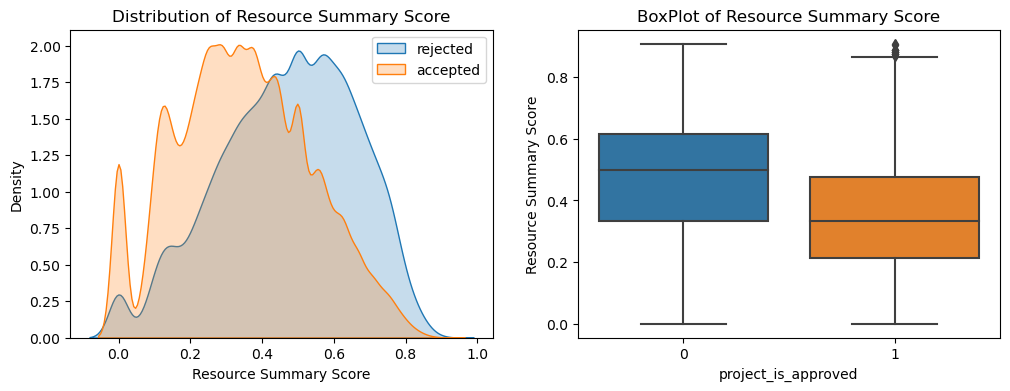

In [106]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==0], x='project_title_scr3', bins=10, kde=True)
# sns.histplot(data=df_text1.loc[df_text1['project_is_approved']==1], x='project_title_scr3', bins=10, kde=True)
sns.kdeplot(data=df_text4.loc[df_text4['project_is_approved']==0], x='res_sum_rej_scr', label='rejected', fill=True)
sns.kdeplot(data=df_text4.loc[df_text4['project_is_approved']==1], x='res_sum_rej_scr', label='accepted', fill=True)
plt.xlabel('Resource Summary Score')
plt.title('Distribution of Resource Summary Score')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df_text4, y='res_sum_rej_scr', x='project_is_approved')
plt.ylabel('Resource Summary Score')
plt.title('BoxPlot of Resource Summary Score')
plt.show()

# **Compiling and Saving Datasets**

In [107]:
df_text1.head(1)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   

                                      project_title  project_is_approved  \
0  Educational Support for English Learners at Home                    0   

   title_emoj  title_emot  title_punc  title_capwords  title_capwords_r  \
0           0           0           0               0               0.0   

   title_words  title_chars  title_chars_r  title_stopwords  \
0            7           48          6.857                2   

   title_nonstopwords  title_stopwords_r  \
0                   5              0.286   

                                  project_title_pp1  \
0  educational support for english learners at home   

                   project_title_cln  title_rej_scr  
0  educ support english learner home            0.6

In [108]:
df_text2.head(1)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   

                                         proj_essay1  \
0  My students are English learners that are work...   

                                         proj_essay2  project_is_approved  \
0  \"The limits of your language are the limits o...                    0   

   ess1_count_pid                                    proj_essay1_pp1  \
0               1  my students are English learners that are work...   

   ess1_capwords  ess1_capwords_r  \
0              5            0.057   

                                     proj_essay1_pp2  ...  ess2_chars  \
0  my students are english learners that are work...  ...        1056   

   ess2_word_sent_r  ess2_char_word_r  ess2_stopwords  ess2_nonstopwords  \
0            20.778             5.647              90                 97   

   ess2_stopwords_r  ess2_ques_mark  ess2_excl_mark  \
0             0.481               0               0   

                                     proj_essay2_cln  ess2_rej_scr  
0  limit languag limit worldludwig wittgenstein e...      0.546392  

[1 rows x 38 columns]

In [109]:
df_text3.head(1)

id  project_is_approved  \
0  p253737                    0   

                                     proj_essay1_cln  \
0  student english learner work english second th...   

                                     proj_essay2_cln  ess_sim_cwc_min  \
0  limit languag limit worldludwig wittgenstein e...         0.243237   

   ess_sim_cwc_max  ess_sim_dif_word  ess_sim_avg_word  ess_sim_long_substr_r  \
0         0.134326                50              72.0               0.053968   

   ess_sim_fuzz_qr  ess_sim_fuzz_wr  ess_sim_fuzz_partial_r  \
0               41               86                      47   

   ess_sim_fuzz_tkn_sort_r  ess_sim_fuzz_tkn_set_r  
0                       50                      52

In [110]:
df_text4.head(1)

id                        teacher_id  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc   

                            project_resource_summary  project_is_approved  \
0  My students need opportunities to practice beg...                    0   

                        project_resource_summary_pp1  res_sum_capwords  \
0  my students need opportunities to practice beg...                 1   

   res_sum_capwords_r                       project_resource_summary_pp2  \
0               0.077  my students need opportunities to practice beg...   

   res_sum_sents  res_sum_words  res_sum_chars  res_sum_word_sent_r  \
0              1             13             87                 13.0   

   res_sum_char_word_r  res_sum_stopwords  res_sum_nonstopwords  \
0                6.692                  4                     9   

   res_sum_stopwords_r  res_sum_ques_mark  res_sum_excl_mark  \
0                0.308                  0                  0   

                        project_resource_summary_cln  res_sum_rej_scr  
0  student need opportun practic begin read skill...         0.444444

In [111]:
df_int1 = df_text1.drop(['teacher_id', 'project_title', 'project_title_pp1'], axis=1)

df_int2 = df_text2.drop(['teacher_id', 'proj_essay1', 'proj_essay2', 
                         'project_is_approved', 'ess1_count_pid', 
                         'proj_essay1_pp1', 'proj_essay1_pp2', 'proj_essay1_cln', 
                         'proj_essay2_pp1', 'proj_essay2_pp2', 'proj_essay2_cln'], axis=1)

df_int3 = df_text3.drop(['project_is_approved'], axis=1)

df_int4 = df_text4.drop(['teacher_id', 'project_resource_summary', 'project_is_approved',
                         'project_resource_summary_pp1', 'project_resource_summary_pp2'], axis=1)

df_basic_nlp_feats1 = pd.merge(pd.merge(pd.merge(df_int1, df_int2), df_int3), df_int4)
df_basic_nlp_feats1.head(2)

id  project_is_approved  title_emoj  title_emot  title_punc  \
0  p253737                    0           0           0           0   
1  p258326                    1           0           0           1   

   title_capwords  title_capwords_r  title_words  title_chars  title_chars_r  \
0               0               0.0            7           48          6.857   
1               0               0.0            5           36          7.200   

   ...  res_sum_chars  res_sum_word_sent_r  res_sum_char_word_r  \
0  ...             87                 13.0                6.692   
1  ...             70                 11.0                6.364   

  res_sum_stopwords  res_sum_nonstopwords  res_sum_stopwords_r  \
0                 4                     9                0.308   
1                 4                     7                0.364   

   res_sum_ques_mark  res_sum_excl_mark  \
0                  0                  0   
1                  0                  0   

                        project_resource_summary_cln  res_sum_rej_scr  
0  student need opportun practic begin read skill...         0.444444  
1      student need projector help view educ program         0.285714  

[2 rows x 67 columns]

In [112]:
df_basic_nlp_feats1.shape

(109245, 67)

In [113]:
df_basic_nlp_feats1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109245 entries, 0 to 109244
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            109245 non-null  object 
 1   project_is_approved           109245 non-null  int64  
 2   title_emoj                    109245 non-null  int64  
 3   title_emot                    109245 non-null  int64  
 4   title_punc                    109245 non-null  int64  
 5   title_capwords                109245 non-null  int64  
 6   title_capwords_r              109245 non-null  float64
 7   title_words                   109245 non-null  int64  
 8   title_chars                   109245 non-null  int64  
 9   title_chars_r                 109245 non-null  float64
 10  title_stopwords               109245 non-null  int64  
 11  title_nonstopwords            109245 non-null  int64  
 12  title_stopwords_r             109245 non-nul

In [114]:
# df_text1.to_csv(path_or_buf='./data/nlp_features/df_text1.csv', sep=',', index=False)
# df_text2.to_csv(path_or_buf='./data/nlp_features/df_text2.csv', sep=',', index=False)
# df_text3.to_csv(path_or_buf='./data/nlp_features/df_text3.csv', sep=',', index=False)
# df_text4.to_csv(path_or_buf='./data/nlp_features/df_text4.csv', sep=',', index=False)
# df_basic_nlp_feats1.to_csv(path_or_buf='./data/nlp_features/df_basic_nlp_feats1.csv', sep=',', index=False)

# **Detailed Word Cloud Analysis: Overall**

In [129]:
def plot_wordcloud(df, cleaned_text_feature):
    
    # From all submissions, create vocabulary
    text_feature_corpus = []
    for lst in df[cleaned_text_feature].str.split():
        lst = [str(word) for word in lst]
        text_feature_corpus += lst
    
    # Generating word cloud for cleaned textual features
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(max_font_size=None, stopwords=None, background_color='black',).generate((' ').join(text_feature_corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

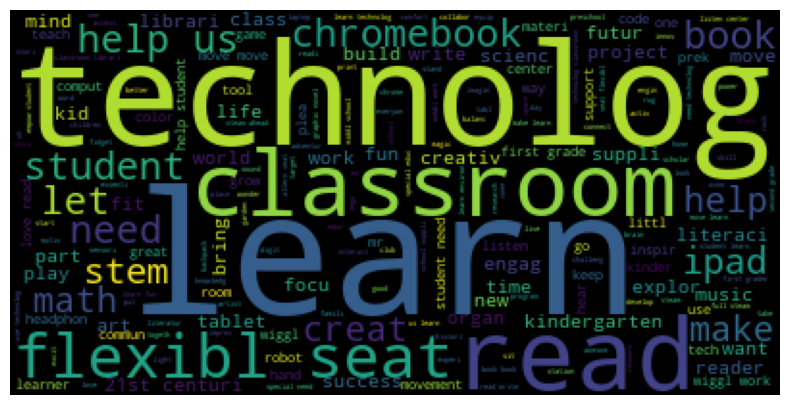

In [130]:
plot_wordcloud(df_text1, 'project_title_cln')

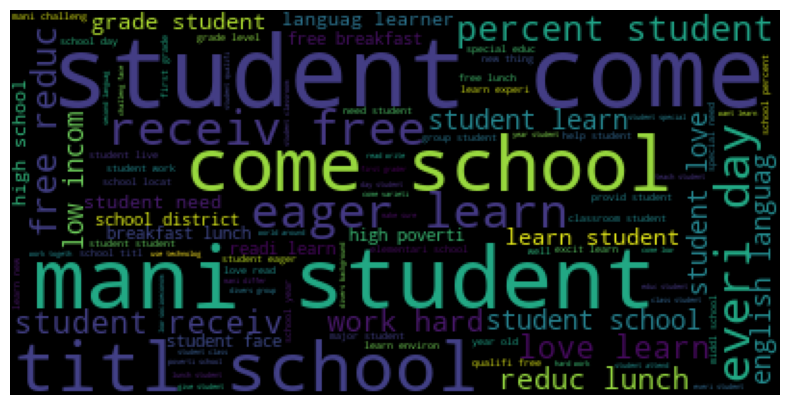

In [131]:
plot_wordcloud(df_text2, 'proj_essay1_cln')

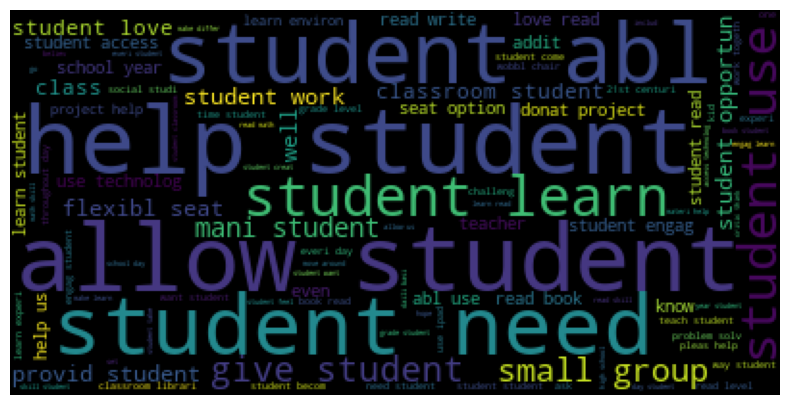

In [132]:
plot_wordcloud(df_text2, 'proj_essay2_cln')

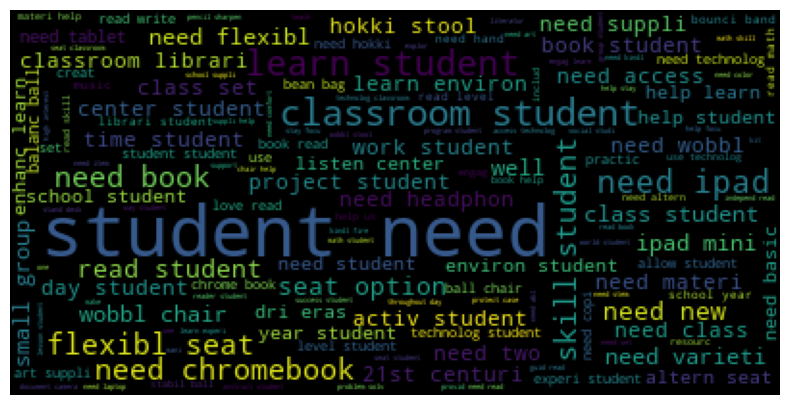

In [135]:
plot_wordcloud(df_text4, 'project_resource_summary_cln')

# **Detailed Word Cloud Analysis: Rejected vs Accepted Submissions**

In [138]:
exclusive_pop_words_rej_title

suppli        23.852721
math          17.039800
stem          14.355619
flexibl       14.155680
scienc        13.170981
                ...    
wobbl        -11.786403
wiggl        -13.865769
ipad         -13.870767
chromebook   -23.657781
book         -29.560979
Length: 14597, dtype: float64

In [136]:
exclusive_pop_words_rej_essay1

help          6.582576
suppli        4.050816
need          4.028312
educ          3.499455
special       3.431942
               ...    
student      -7.415244
day          -7.741560
technolog    -9.463157
school      -11.499817
read        -11.556079
Length: 33109, dtype: float64

In [137]:
exclusive_pop_words_rej_essay2

materi        33.025992
learn         31.926665
suppli        18.078844
school        15.870952
want           8.443568
                ...    
chromebook   -11.279646
ipad         -11.713834
read         -24.157474
use          -25.136706
book         -30.818100
Length: 45442, dtype: float64

In [140]:
exclusive_pop_words_rej_resource_summary

suppli        62.045001
materi        60.199593
item          25.180530
learn         23.291444
equip         19.404077
                ...    
chair        -17.766142
ipad         -20.452356
read         -26.916742
chromebook   -27.528238
book         -40.216779
Length: 18747, dtype: float64

In [148]:
# !pip uninstall PIL
# !pip uninstall Pillow
# !pip install Pillow

In [147]:
from PIL import Image

In [194]:
def plot_masked_wordcloud(word_series, top_n):
    
    # From all submissions, create vocabulary
    
    top_n_rej_words_dict = word_series.iloc[:top_n].to_dict()
    top_n_acc_words_dict = word_series.sort_values(ascending=True).iloc[:top_n].to_dict()
    

    
    # Generating word cloud for cleaned textual features
    thumbs_up = np.array(Image.open("./images/Thumbs_Up.png"))
    thumbs_down = np.array(Image.open("./images/Thumbs_Down.png"))
    
    

    rej_wordcloud = WordCloud(max_font_size=None, 
                              stopwords=None, 
                              mask=thumbs_down,
                              background_color='white',).generate((' ').join(top_n_rej_words_dict))
    acc_wordcloud = WordCloud(max_font_size=None, 
                              stopwords=None, 
                              mask=thumbs_up,
                              background_color='white',).generate((' ').join(top_n_acc_words_dict))
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.imshow(rej_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(acc_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

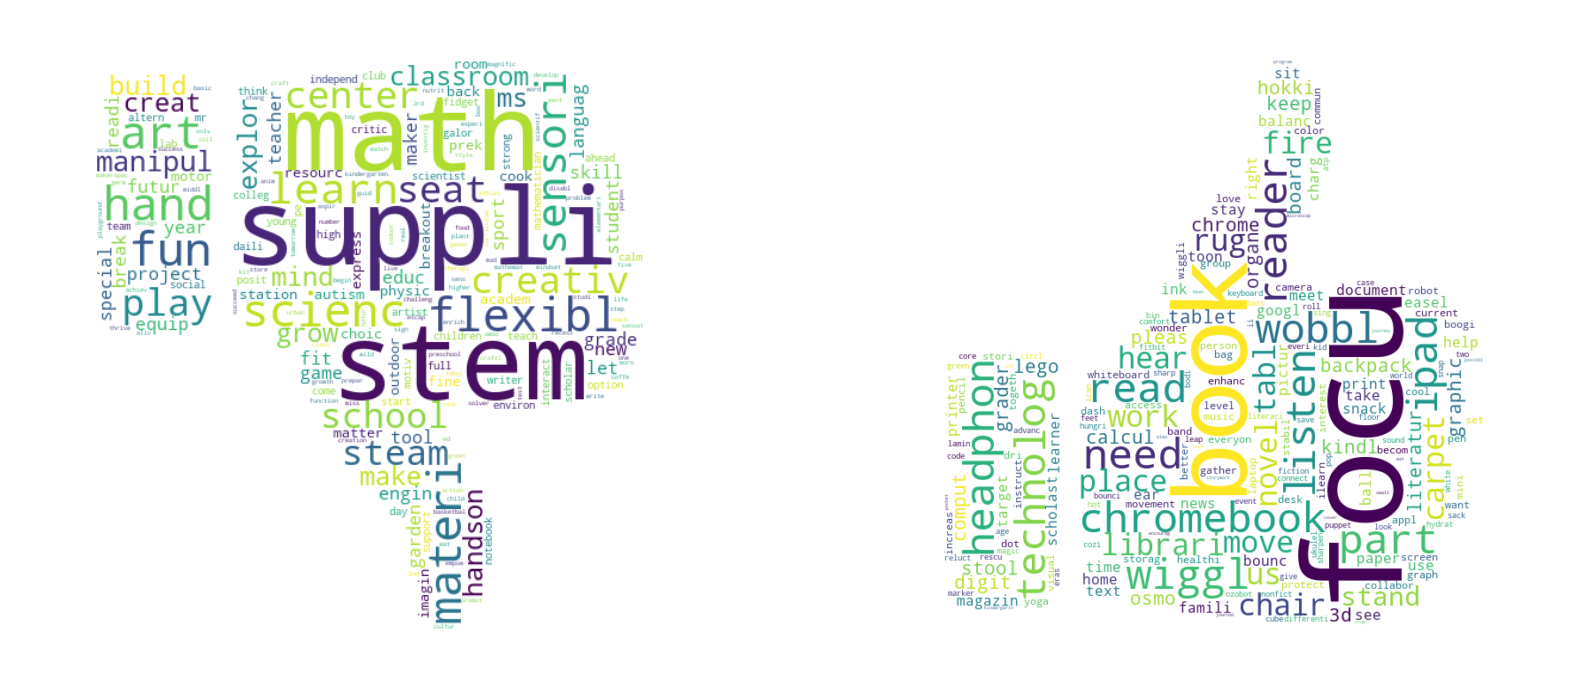

In [196]:
plot_masked_wordcloud(exclusive_pop_words_rej_title, 300)

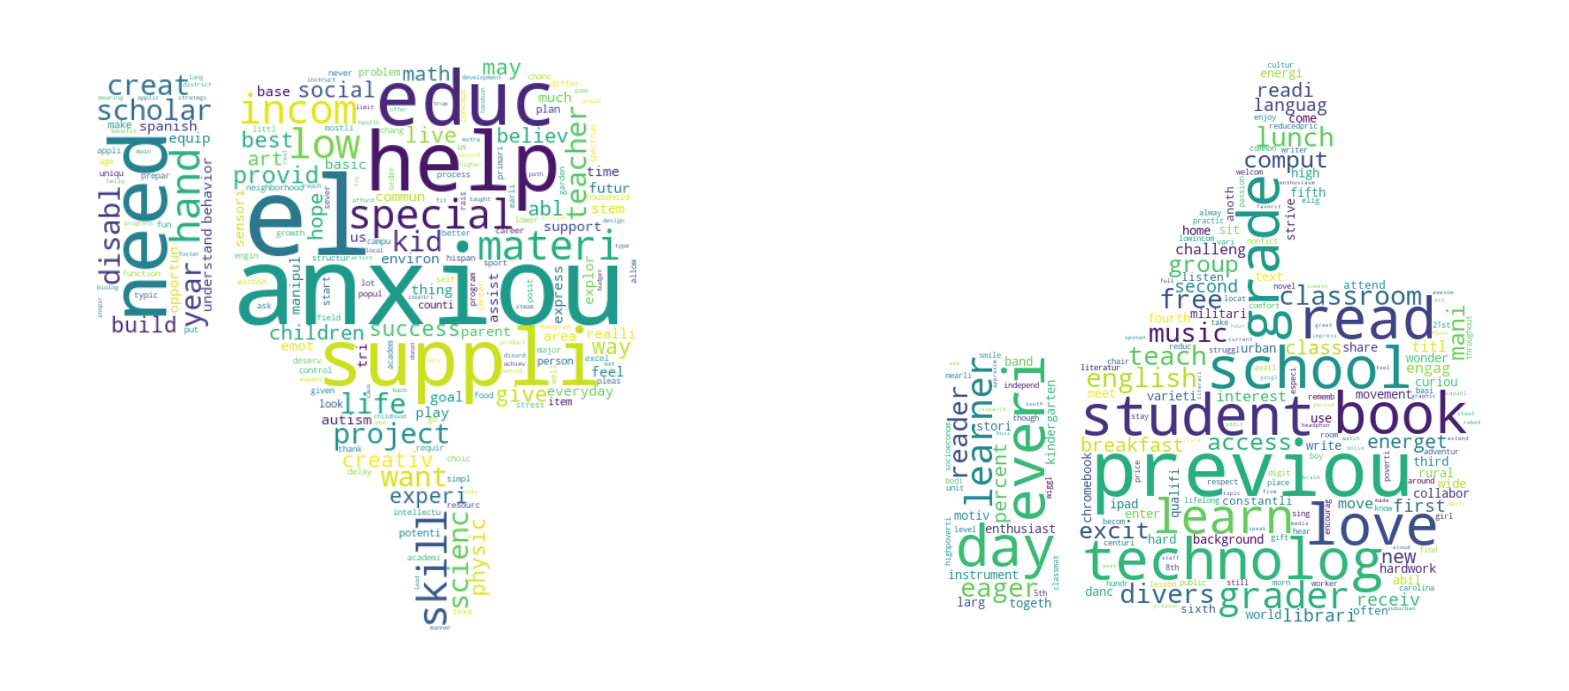

In [201]:
plot_masked_wordcloud(exclusive_pop_words_rej_essay1, 2000)

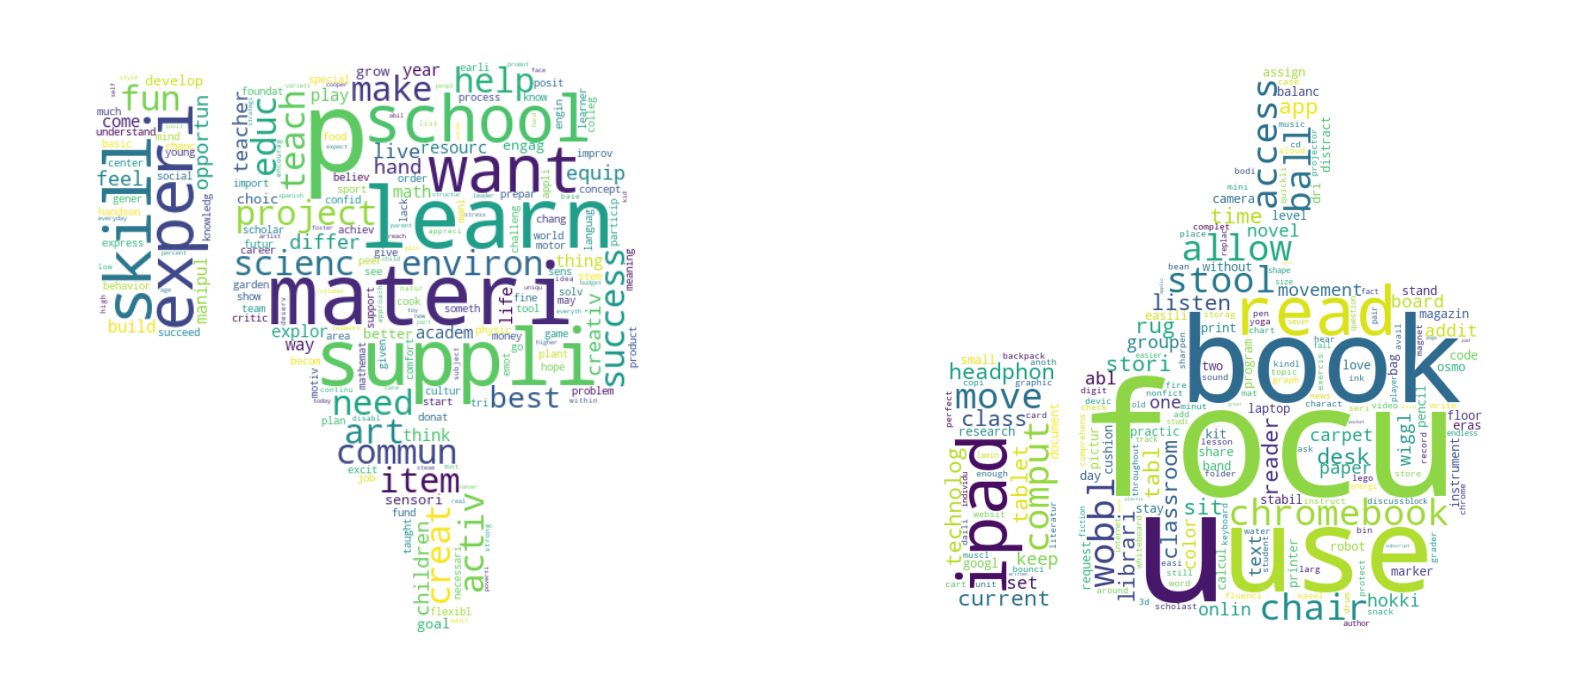

In [205]:
plot_masked_wordcloud(exclusive_pop_words_rej_essay2, 2000)

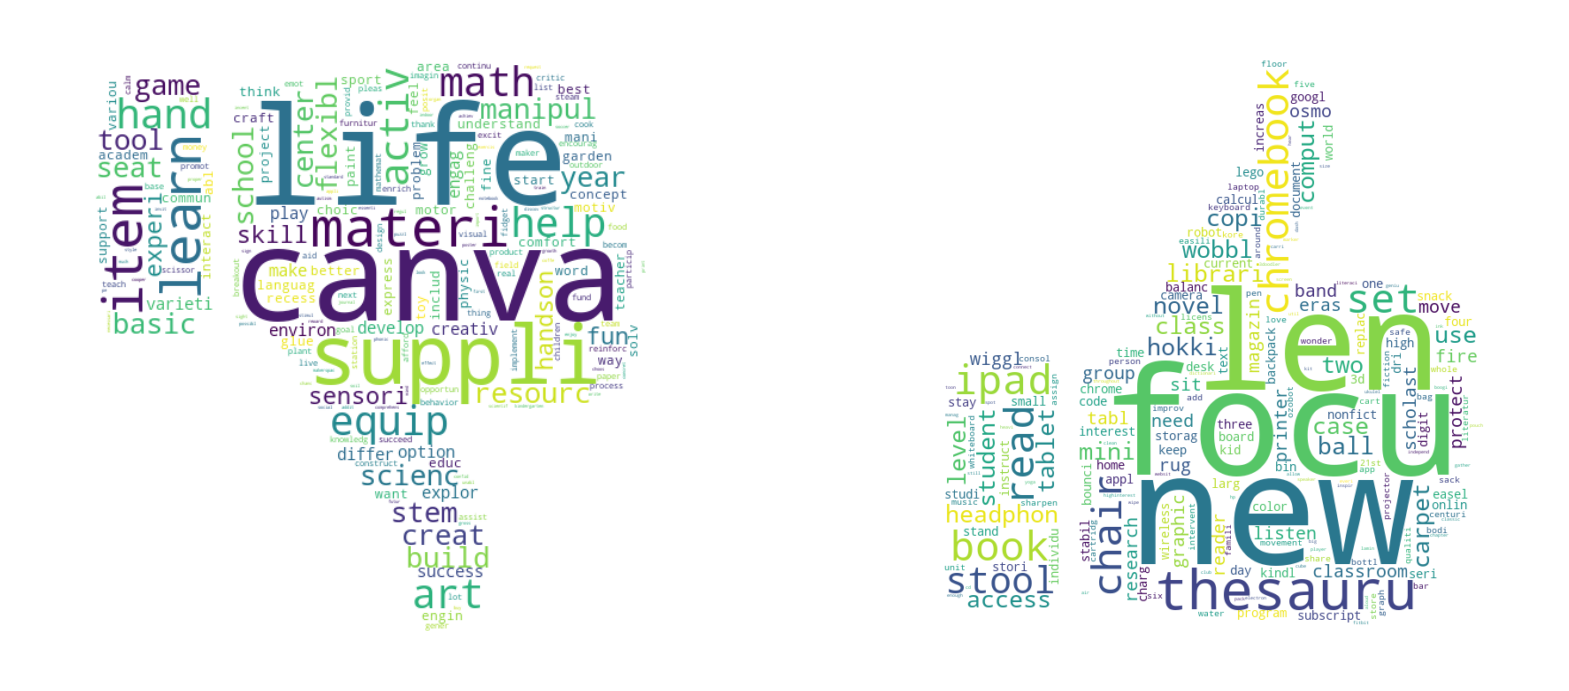

In [209]:
plot_masked_wordcloud(exclusive_pop_words_rej_resource_summary, 2000)

In [197]:
# exclusive_pop_words_rej_title
# exclusive_pop_words_rej_essay1
# exclusive_pop_words_rej_essay2
# exclusive_pop_words_rej_resource_summary

In [115]:
# BoW, TF-IDF, Word Embeddings of textual features
# TF-IDF approach can be taken : To identify explicit and popular words in rejected submissions